## Les 4 Embeddings

In dit notebook worden er meerdere teksten (Wikipedia-pagina over kanker, abstracts en Bulkley-publicatie) verwerkt tot één dataset, wordt er tokenisatie uitgevoerd, wordt een MLP getraind om embeddings te leren, en worden deze embeddings in 2D gevisualiseerd.

Er wordt geprobeerd om
- Samengevoegde tekst te maken
- Tokenisatie en BPE encoding uit te voeren
- MLP embeddings te trainen
- 2D-visualisatie van embeddings te maken

Teksten samenvoegen zodat er één bestand is genaamd merged.txt die gebruikt wordt voor tokenisatie

In [2]:
#lees alle txt data in en maak er een merged.txt file van
files = ["wikipedia_engels.txt", "bulkley.txt", "Pubmed_cancer.txt"]
with open("merged.txt", "w", encoding="utf-8") as fout:
    for file in files:
        with open(file, "r", encoding="utf-8") as f:
            fout.write(f.read() + "\n")

with open("merged.txt", "r", encoding="utf-8") as f:
    print(f.read(500))  # print eerste 500 tekens zodat je kunt zien dat merged.txt is aangemaakt


Cancer is a group of diseases involving abnormal cell growth with the potential to invade or spread to other parts of the body.[2][7] These contrast with benign tumors, which do not spread.[7] Possible signs and symptoms of cancer include a lump, abnormal bleeding, prolonged cough, unexplained weight loss, and a change in bowel movements.[1] While these symptoms may indicate cancer, they can also have other causes.[1] Over 100 types of cancers affect humans.[7][8]

About 33% of deaths from cance


### Tokenisatie
Woorden maken van de tekst, elk element is nog een woord en nog geen BPE-token

In [3]:
from nlp import filereader

# Woordenlijst maken door op witruimte te splitsen
woorden = filereader("merged.txt")
print(f"Aantal woorden in tekst: {len(woorden)}")
print("Voorbeeld woorden:", woorden[:50])

Aantal woorden in tekst: 96702
Voorbeeld woorden: ['Cancer', 'is', 'a', 'group', 'of', 'diseases', 'involving', 'abnormal', 'cell', 'growth', 'with', 'the', 'potential', 'to', 'invade', 'or', 'spread', 'to', 'other', 'parts', 'of', 'the', 'body.[2][7]', 'These', 'contrast', 'with', 'benign', 'tumors,', 'which', 'do', 'not', 'spread.[7]', 'Possible', 'signs', 'and', 'symptoms', 'of', 'cancer', 'include', 'a', 'lump,', 'abnormal', 'bleeding,', 'prolonged', 'cough,', 'unexplained', 'weight', 'loss,', 'and', 'a']


### BPE/Encoder maken

BPE-tokenisatie uitvoeren (Byte-pair encoding)
Converteer woorden naar numerieke token-id's met token(string).

In [4]:
from nlp import encoder

# BPE/encoder maken
#max_tokens: maximale unieke tokens in de encoding
#min_freq: minimaal aantal keren dat een paar tokens moet voorkomen om samengevoegd te worden

# Eerste set instellingen
words_tokens_1, id_to_tok_1 = encoder(woorden, max_tokens=120, min_freq=2)
print(f"[Run 1] Aantal unieke tokens: {len(id_to_tok_1)}")

# Tweede set instellingen
words_tokens_2, id_to_tok_2 = encoder(woorden, max_tokens=200, min_freq=3)
print(f"[Run 2] Aantal unieke tokens: {len(id_to_tok_2)}")

# Derde set instellingen
words_tokens_3, id_to_tok_3 = encoder(woorden, max_tokens=500, min_freq=5)
print(f"[Run 3] Aantal unieke tokens: {len(id_to_tok_3)}")

# Vierde set instellingen
words_tokens_4, id_to_tok_4 = encoder(woorden, max_tokens=1000, min_freq=10)
print(f"[Run 4] Aantal unieke tokens: {len(id_to_tok_4)}")

# Toon token-ID's én de inhoud voor de eerste 5 woorden
print("\nVoorbeeld token-ID's en token-inhoud [Run 1]:")
for i, w_tokens in enumerate(words_tokens_1[:5]):
    tokens_inhoud = [id_to_tok_1[t] for t in w_tokens]
    print(f"Woord {i+1}: token-ID's = {w_tokens}, tokens = {tokens_inhoud}")

print("\nVoorbeeld token-ID's en token-inhoud [Run 2]:")
for i, w_tokens in enumerate(words_tokens_2[:5]):
    tokens_inhoud = [id_to_tok_2[t] for t in w_tokens]
    print(f"Woord {i+1}: token-ID's = {w_tokens}, tokens = {tokens_inhoud}")

print("\nVoorbeeld token-ID's en token-inhoud [Run 3]:")
for i, w_tokens in enumerate(words_tokens_3[:5]):
    tokens_inhoud = [id_to_tok_3[t] for t in w_tokens]
    print(f"Woord {i+1}: token-ID's = {w_tokens}, tokens = {tokens_inhoud}")

print("\nVoorbeeld token-ID's en token-inhoud [Run 4]:")
for i, w_tokens in enumerate(words_tokens_4[:5]):
    tokens_inhoud = [id_to_tok_4[t] for t in w_tokens]
    print(f"Woord {i+1}: token-ID's = {w_tokens}, tokens = {tokens_inhoud}")


[Run 1] Aantal unieke tokens: 122
[Run 2] Aantal unieke tokens: 200
[Run 3] Aantal unieke tokens: 500
[Run 4] Aantal unieke tokens: 1000

Voorbeeld token-ID's en token-inhoud [Run 1]:
Woord 1: token-ID's = [1, 2, 3, 4, 5, 6], tokens = ['C', 'a', 'n', 'c', 'e', 'r']
Woord 2: token-ID's = [7, 8], tokens = ['i', 's']
Woord 3: token-ID's = [2], tokens = ['a']
Woord 4: token-ID's = [9, 6, 10, 11, 12], tokens = ['g', 'r', 'o', 'u', 'p']
Woord 5: token-ID's = [10, 13], tokens = ['o', 'f']

Voorbeeld token-ID's en token-inhoud [Run 2]:
Woord 1: token-ID's = [1, 148], tokens = ['C', 'ancer']
Woord 2: token-ID's = [134], tokens = ['is']
Woord 3: token-ID's = [2], tokens = ['a']
Woord 4: token-ID's = [9, 6, 146, 12], tokens = ['g', 'r', 'ou', 'p']
Woord 5: token-ID's = [132], tokens = ['of']

Voorbeeld token-ID's en token-inhoud [Run 3]:
Woord 1: token-ID's = [447], tokens = ['Cancer']
Woord 2: token-ID's = [134], tokens = ['is']
Woord 3: token-ID's = [2], tokens = ['a']
Woord 4: token-ID's = [9,

### Dataset bouwen voor MLP (multi-layer perceptrons)

Bouwen van de input X en target Y met X = context vectors en Y = token-id's

In [5]:
from nlp import build_token_mappings
from embedding import build_dataset

# Definieer je instellingen voor BPE-runs
bpe_runs = [
    {"words_tokens": words_tokens_1, "id_to_tok": id_to_tok_1, "label": "Run 1"},
    {"words_tokens": words_tokens_2, "id_to_tok": id_to_tok_2, "label": "Run 2"},
    {"words_tokens": words_tokens_3, "id_to_tok": id_to_tok_3, "label": "Run 3"},
    {"words_tokens": words_tokens_4, "id_to_tok": id_to_tok_4, "label": "Run 4"}
]

# Kies de windows die je wilt testen
windows = [2, 4, 6]

# Opslag voor resultaten
dataset_results = []

for run in bpe_runs:
    for window in windows:
        # Maak token mappings
        all_tokens, token_to_idx, idx_to_token = build_token_mappings(run["id_to_tok"])
        # Bouw dataset
        X, Y, token_counter = build_dataset(run["words_tokens"], run["id_to_tok"], token_to_idx, n=window)
        # Sla alles op in dictionary
        result = {
            "label": run["label"],
            "window": window,
            "all_tokens": all_tokens,
            "token_to_idx": token_to_idx,
            "idx_to_token": idx_to_token,
            "X": X,
            "Y": Y,
            "token_counter": token_counter
        }
        dataset_results.append(result)
        print(f"[{run['label']} | window={window}] Tokens: {len(all_tokens)}, Voorbeelden: {X.shape[0]}, Features: {X.shape[1]}")


[Run 1 | window=2] Tokens: 122, Voorbeelden: 163347, Features: 122
[Run 1 | window=4] Tokens: 122, Voorbeelden: 32891, Features: 122
[Run 1 | window=6] Tokens: 122, Voorbeelden: 3327, Features: 122
[Run 2 | window=2] Tokens: 200, Voorbeelden: 52516, Features: 200
[Run 2 | window=4] Tokens: 200, Voorbeelden: 3690, Features: 200
[Run 2 | window=6] Tokens: 200, Voorbeelden: 730, Features: 200
[Run 3 | window=2] Tokens: 500, Voorbeelden: 18374, Features: 500
[Run 3 | window=4] Tokens: 500, Voorbeelden: 1585, Features: 500
[Run 3 | window=6] Tokens: 500, Voorbeelden: 320, Features: 500
[Run 4 | window=2] Tokens: 1000, Voorbeelden: 9568, Features: 1000
[Run 4 | window=4] Tokens: 1000, Voorbeelden: 842, Features: 1000
[Run 4 | window=6] Tokens: 1000, Voorbeelden: 122, Features: 1000


Bij een hogere max_tokens maakt de BPE-encoder meer samengestelde tokens. Hierdoor worden de tokens langer en semantisch rijker. Omdat ieder token één feature in de one-hot vector vertegenwoordigt, stijgt de dimensionaliteit van de embedding-input wanneer max_tokens groter wordt.

We zien ook dat het aantal trainingsvoorbeelden sterk daalt bij grotere window sizes.
Voor Run 1 daalt het aantal voorbeelden van 163 347 (window = 2) naar 32 891 (window = 4) en uiteindelijk naar 3 327 (window = 6). Dit komt doordat voorbeelden alleen gemaakt kunnen worden wanneer er minimaal n contexttokens vóór en n contexttokens ná de target aanwezig zijn. Een grotere window reduceert dus drastisch het aantal bruikbare posities in de tekst.

Daarnaast blijkt dat een grotere vocabulaire eveneens het aantal trainingsvoorbeelden verlaagt.
Bijvoorbeeld: Run 1 met window = 2 heeft 163 347 voorbeelden, terwijl Run 4 met dezelfde window slechts 9 568 voorbeelden heeft. Dit gebeurt omdat meer BPE-merges leiden tot langere tokens; langere tokens betekenen minder totale tokens in de tekst, waardoor er minder contextvensters gevormd kunnen worden.

Samengevat: een grote vocabulaire levert informatievere tokens op, maar verkleint de dataset. Een grote window levert rijkere contextinformatie op, maar verkleint de dataset nóg sterker.
Daarom moet je zoeken naar een balans tussen voldoende trainingsdata, een passende vocabulairegrootte en een trainbare embeddingdimensie.

### Trainen MLP (multi-layer perceptrons) embeddings

Trainen van een MLP op onze dataset
> - `hidden_size` bepaalt dimensie van embedding
> - `mlp.coefs_[0]` zijn de embeddings van de tokens

In [6]:
from embedding import train_mlp

hidden_sizes = [10, 50, 80]  # verschillende hidden layer groottes
mlp_results = []

for hs in hidden_sizes:
    print(f"\n--- Training MLP met hidden_size = {hs} ---")
    for data in dataset_results:
        # Train MLP voor deze dataset
        mlp = train_mlp(data["X"], data["Y"], hidden_size=hs)
        embeddings = mlp.coefs_[0]  # input -> hidden laag

        # Sla alles op
        mlp_results.append({
            "label": data["label"],
            "window": data["window"],
            "hidden_size": hs,
            "mlp": mlp,
            "embeddings": embeddings,
            "token_to_idx": data["token_to_idx"],
            "idx_to_token": data["idx_to_token"]
        })

        print(f"[{data['label']} | window={data['window']} | hidden_size={hs}] Dimensie embeddings: {embeddings.shape}")



--- Training MLP met hidden_size = 10 ---
[Run 1 | window=2 | hidden_size=10] Dimensie embeddings: (122, 10)
[Run 1 | window=4 | hidden_size=10] Dimensie embeddings: (122, 10)
[Run 1 | window=6 | hidden_size=10] Dimensie embeddings: (122, 10)
[Run 2 | window=2 | hidden_size=10] Dimensie embeddings: (200, 10)
[Run 2 | window=4 | hidden_size=10] Dimensie embeddings: (200, 10)
[Run 2 | window=6 | hidden_size=10] Dimensie embeddings: (200, 10)
[Run 3 | window=2 | hidden_size=10] Dimensie embeddings: (500, 10)
[Run 3 | window=4 | hidden_size=10] Dimensie embeddings: (500, 10)
[Run 3 | window=6 | hidden_size=10] Dimensie embeddings: (500, 10)
[Run 4 | window=2 | hidden_size=10] Dimensie embeddings: (1000, 10)
[Run 4 | window=4 | hidden_size=10] Dimensie embeddings: (1000, 10)
[Run 4 | window=6 | hidden_size=10] Dimensie embeddings: (1000, 10)

--- Training MLP met hidden_size = 50 ---
[Run 1 | window=2 | hidden_size=50] Dimensie embeddings: (122, 50)
[Run 1 | window=4 | hidden_size=50] Dime

Het aantal hidden layers bepaalt alleen de dimensie van de embedding. Hidden_size veranderd niet hoeveel tokens er zijn of iets dergelijks maar alleen hoe groot de vector van elk token wordt. Dit experiment laat zien dat de embeddingdimensie uitsluitend wordt bepaald door de gekozen hidden_size, terwijl de vocabulairegrootte wordt bepaald door de BPE-instellingen (max_tokens). De window size beïnvloedt wél het aantal voorbeelden waaruit geleerd wordt, maar verandert niets aan de vorm van de embeddingmatrix.
Daarom is:
- hidden_size = 50 of 80 → betere embeddings dan 10
- Run 2 (200 tokens) → beste balans tussen informatierijke tokens en genoeg data
- window = 2 → enige window waarbij dataset niet instort

### Embeddings visualiseren
Plot toont de liggen van de tokens in 2D
> Gebruik `min_len` > 0 om alleen langere tokens te tonen.
Bijvoorbeeld tokens van 5 karakters en langer min_len = 5

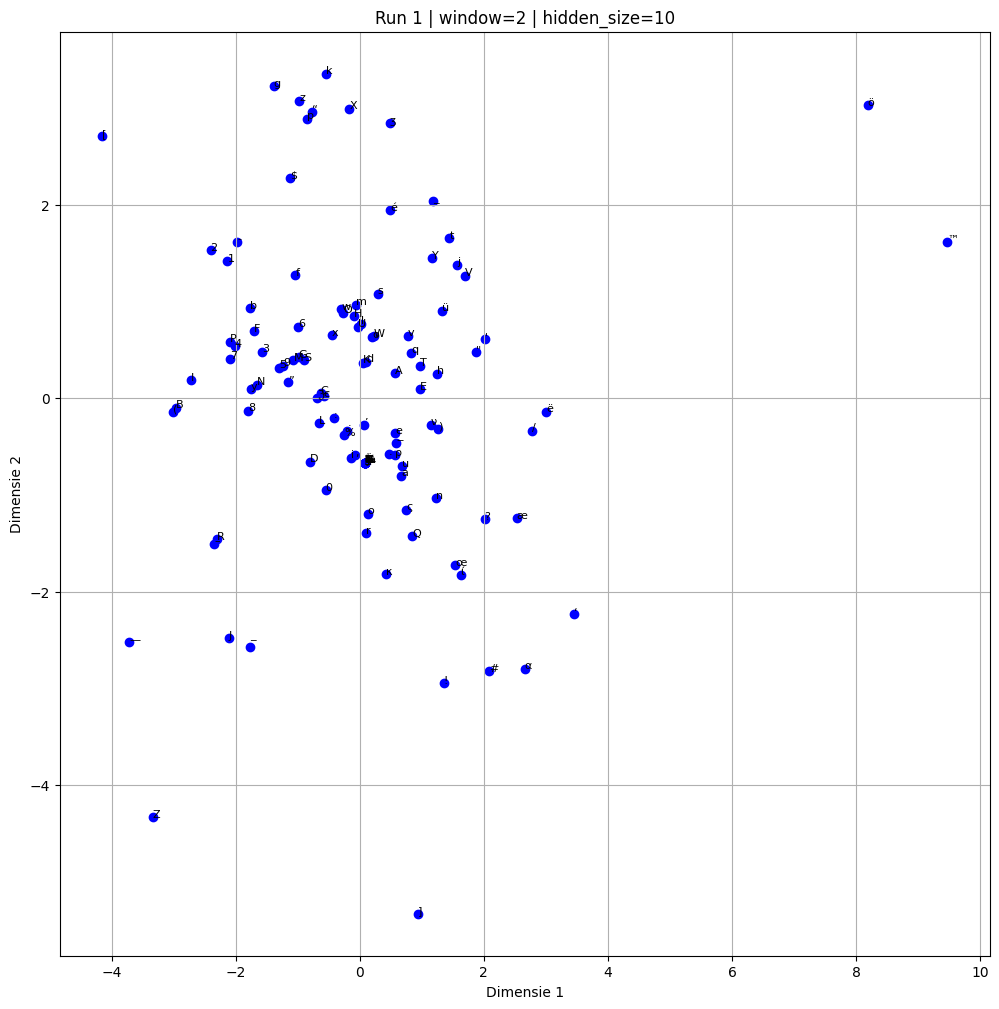

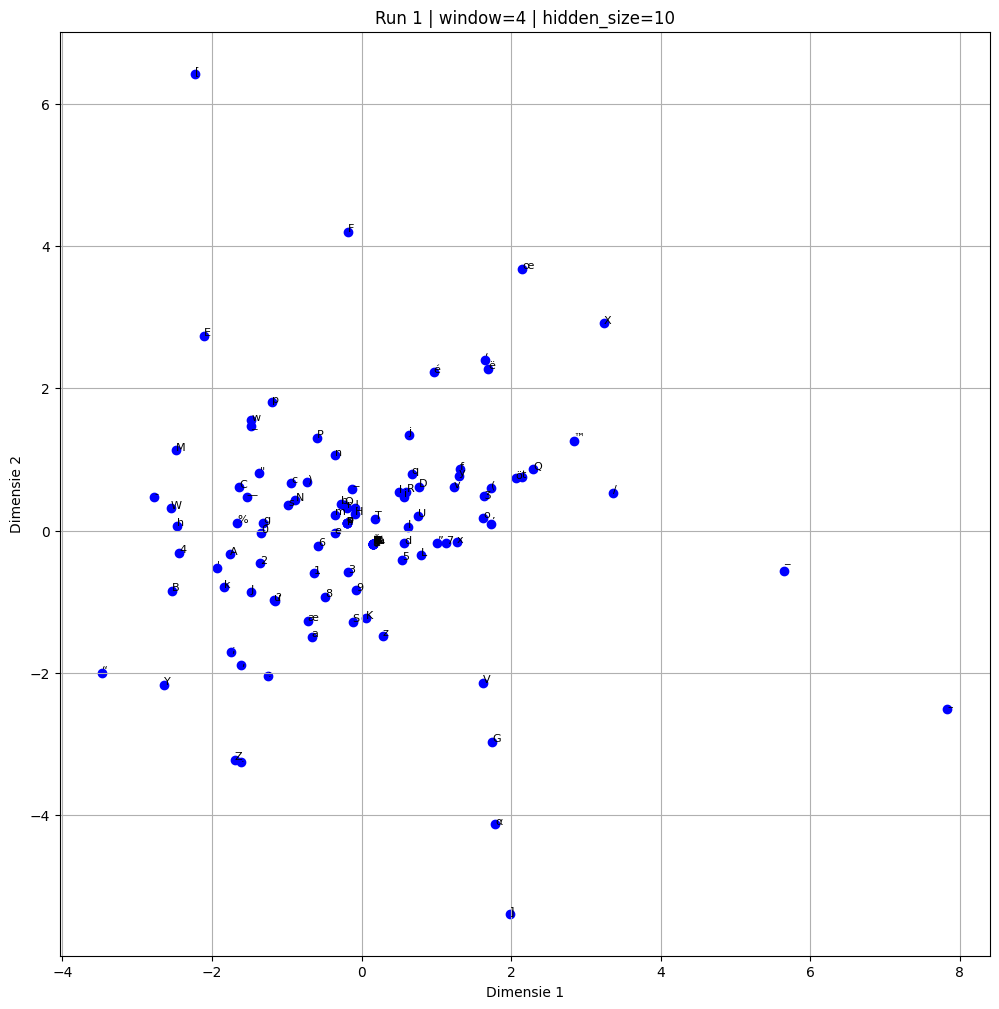

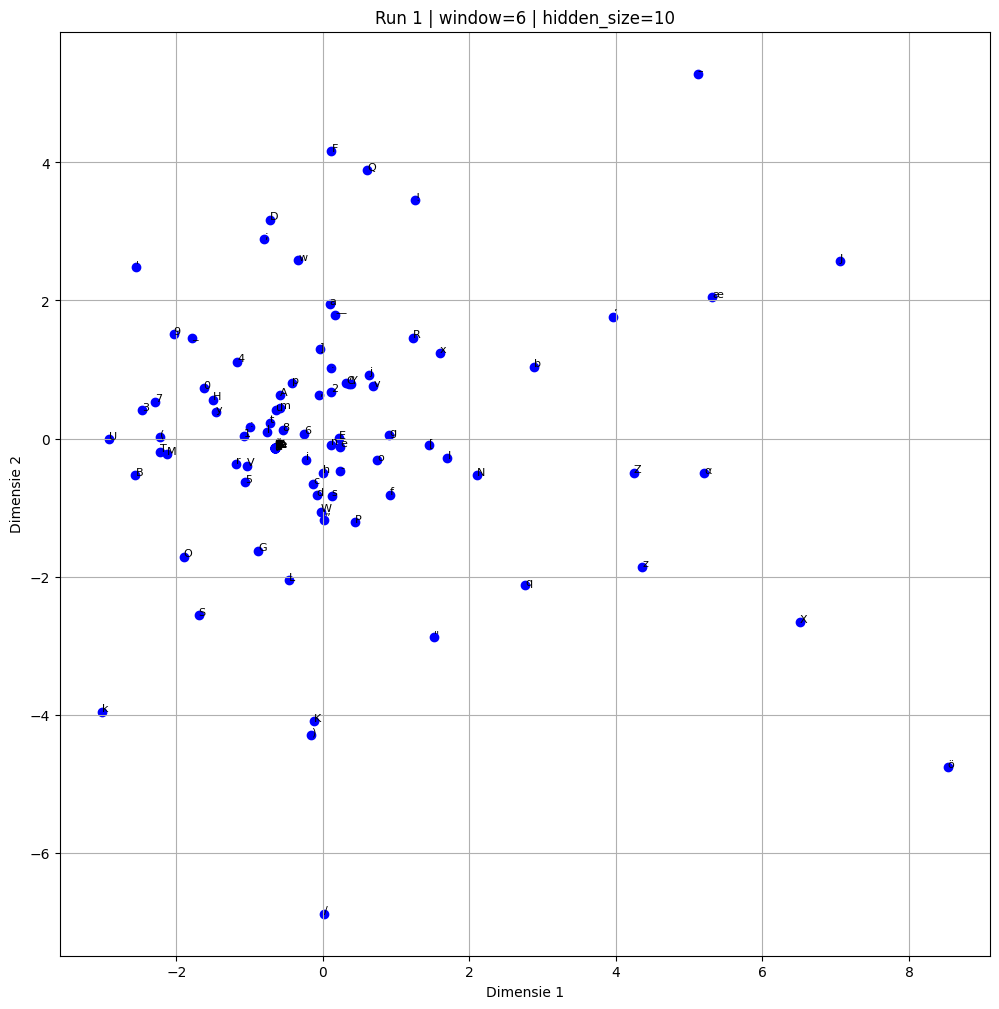

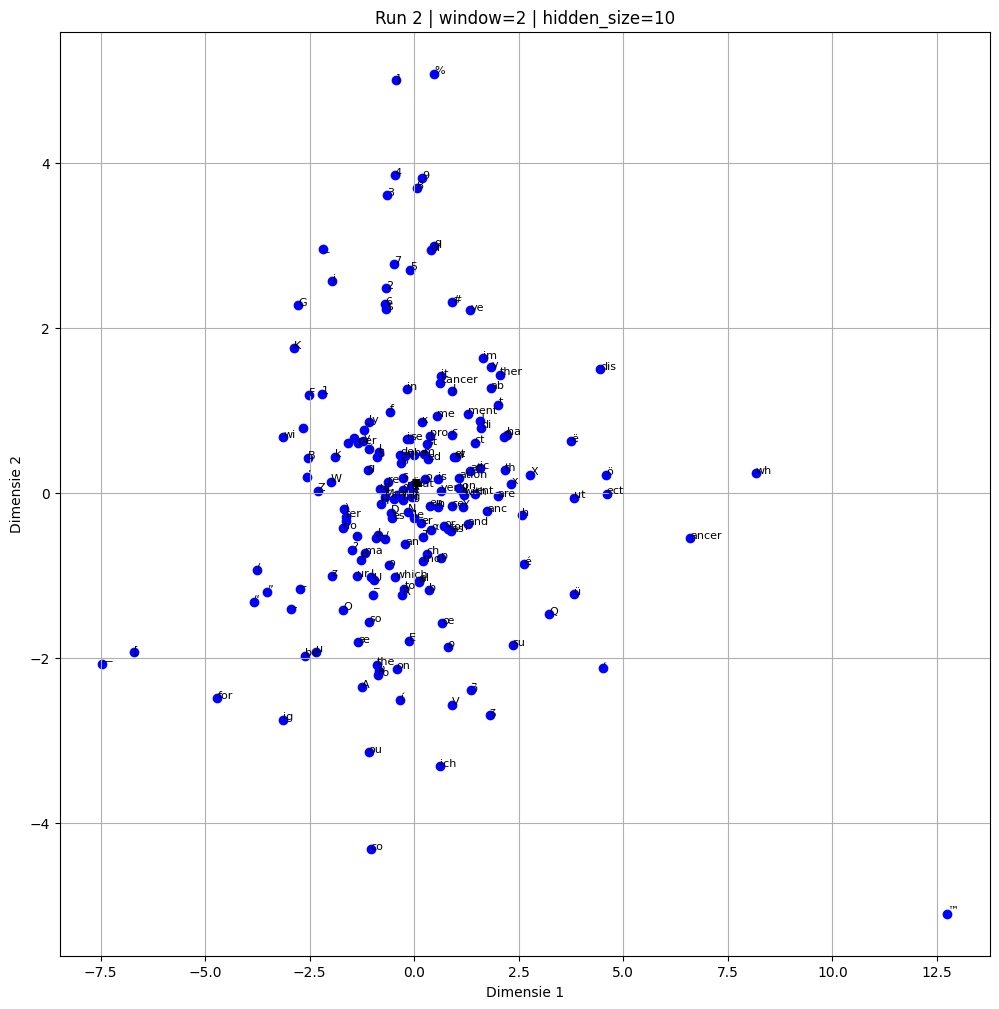

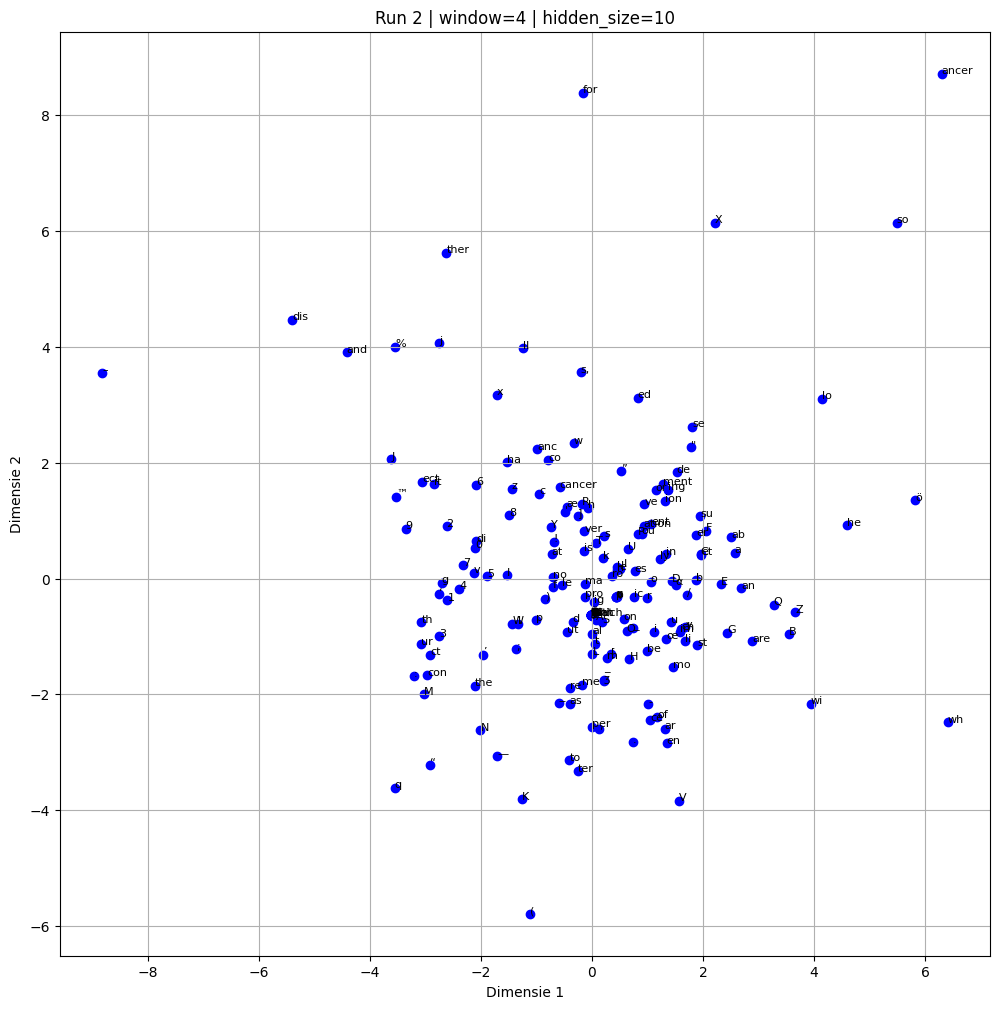

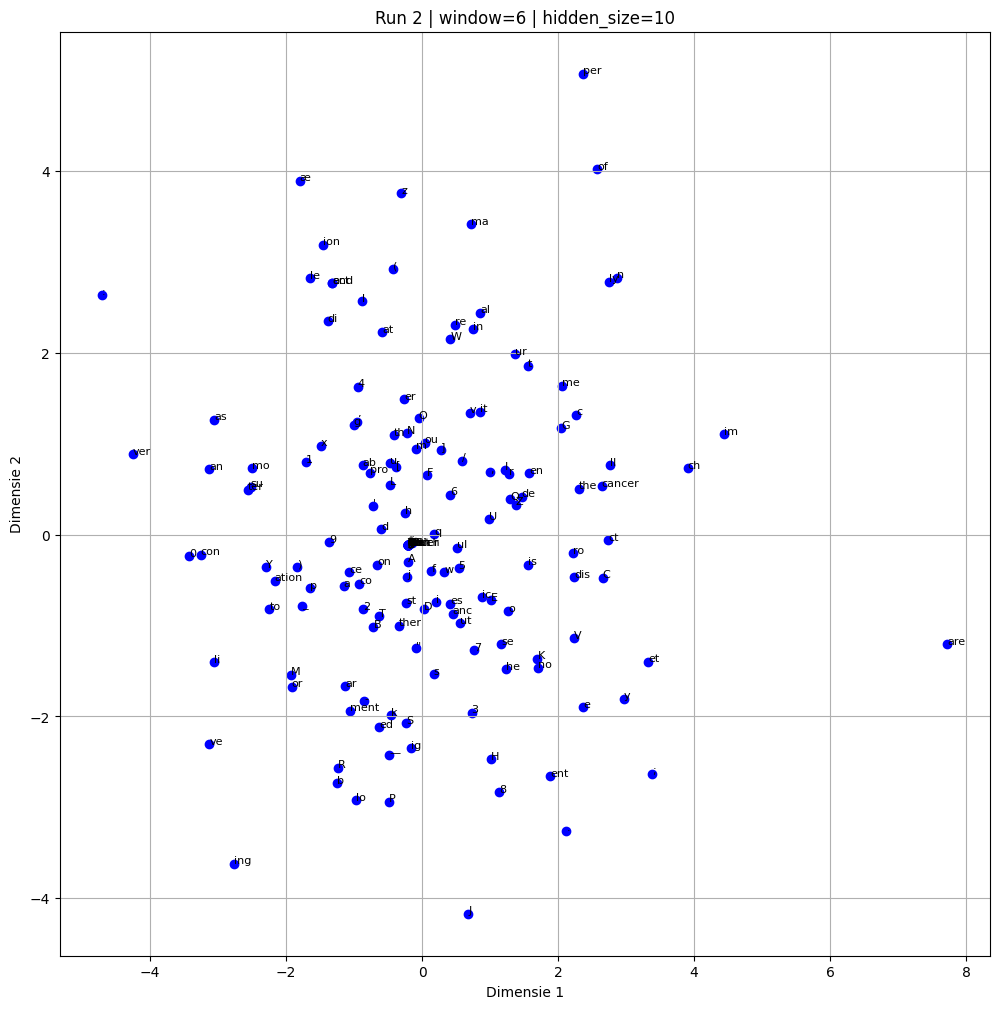

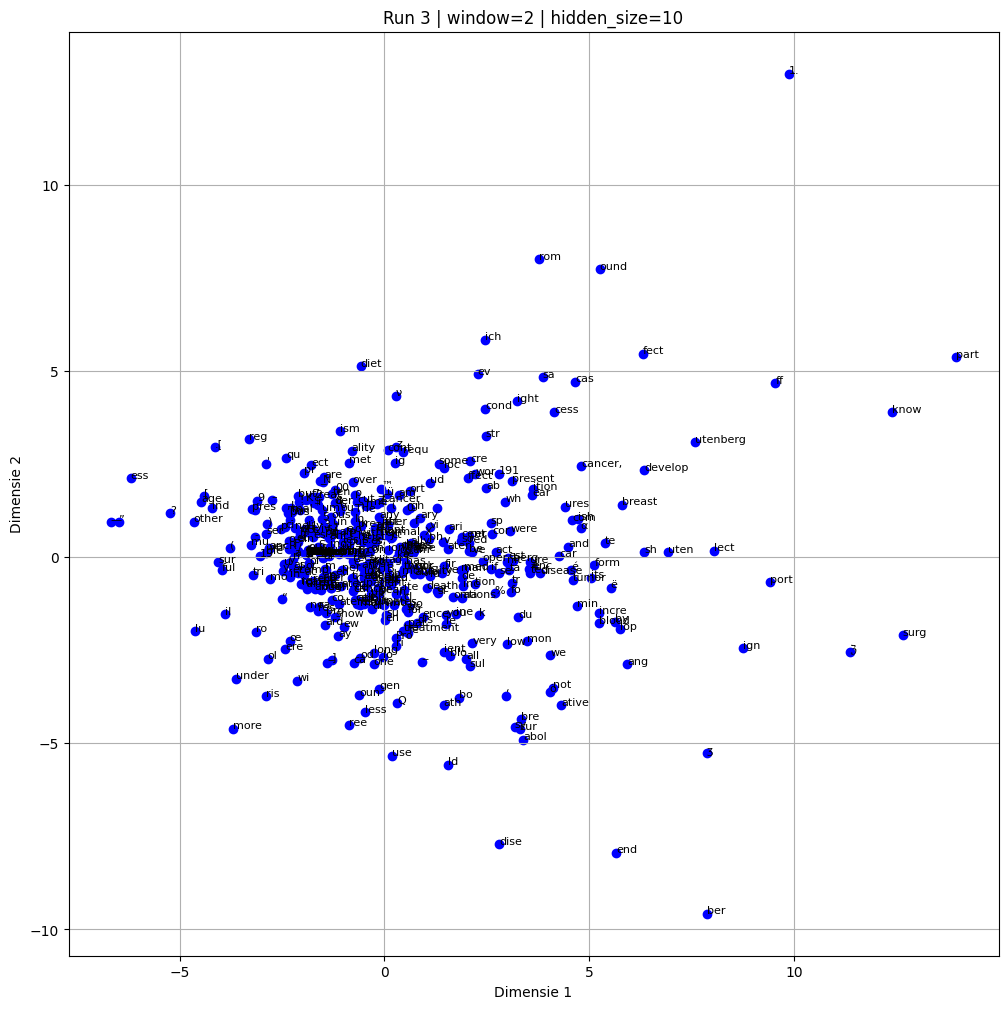

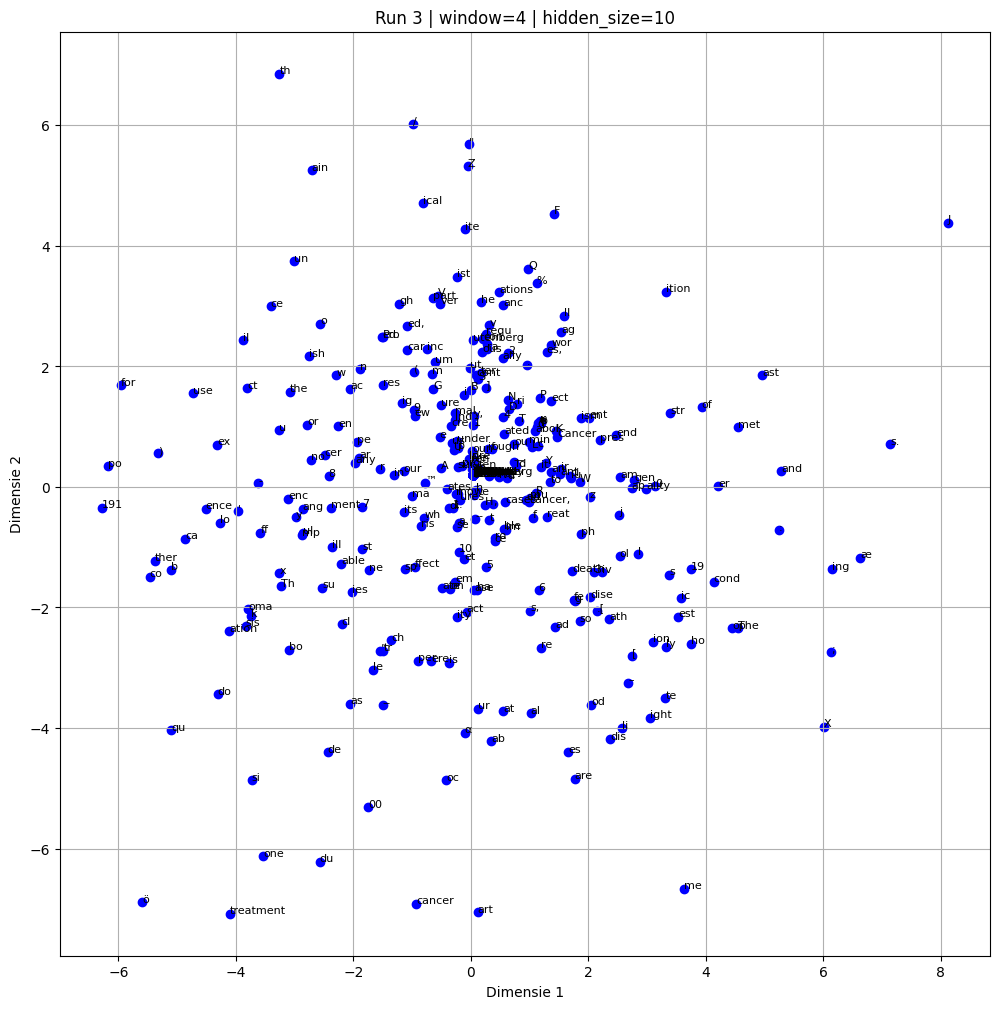

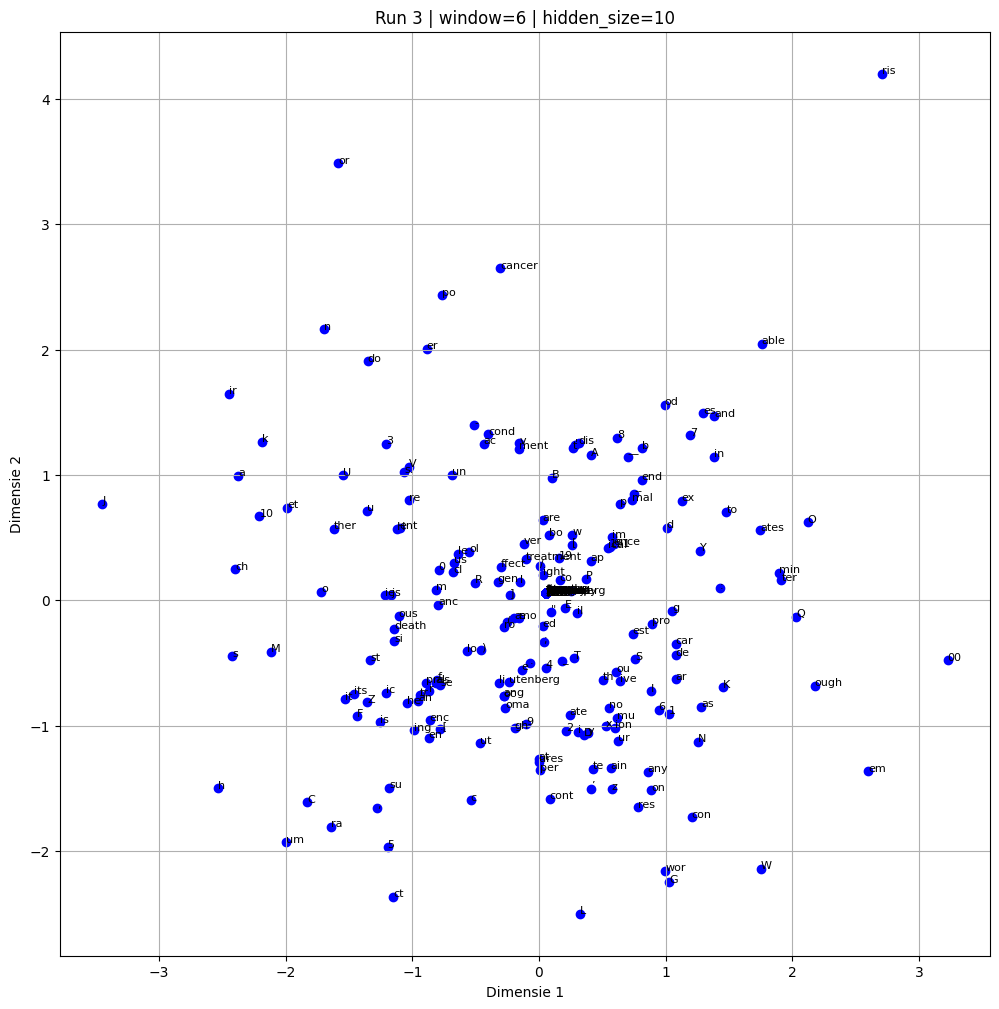

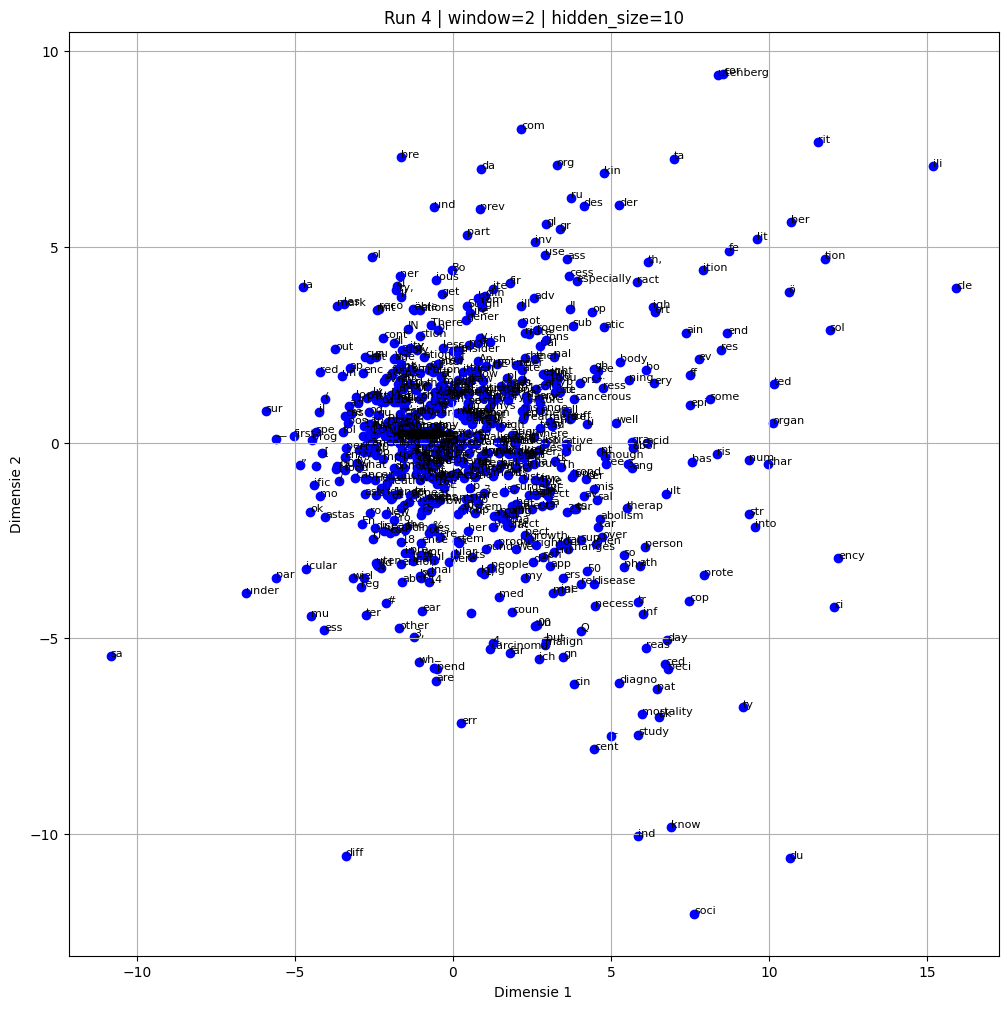

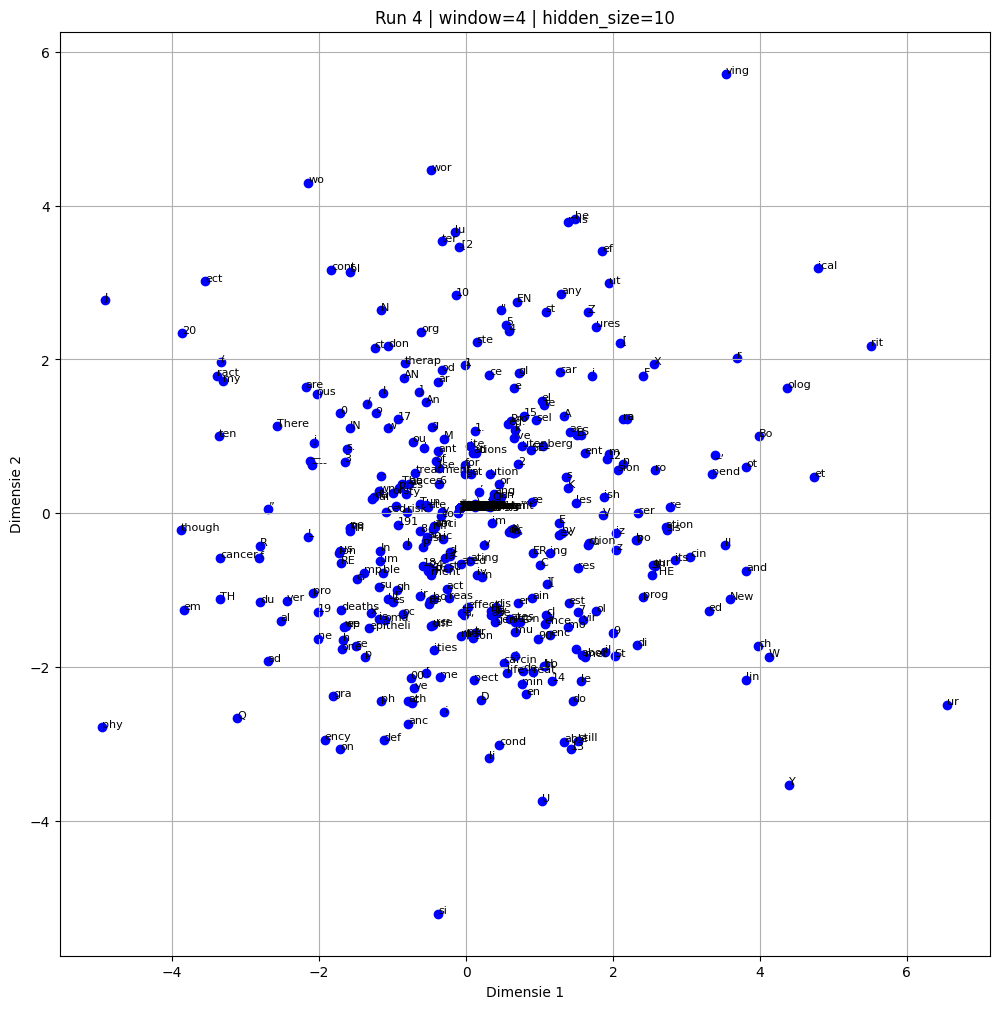

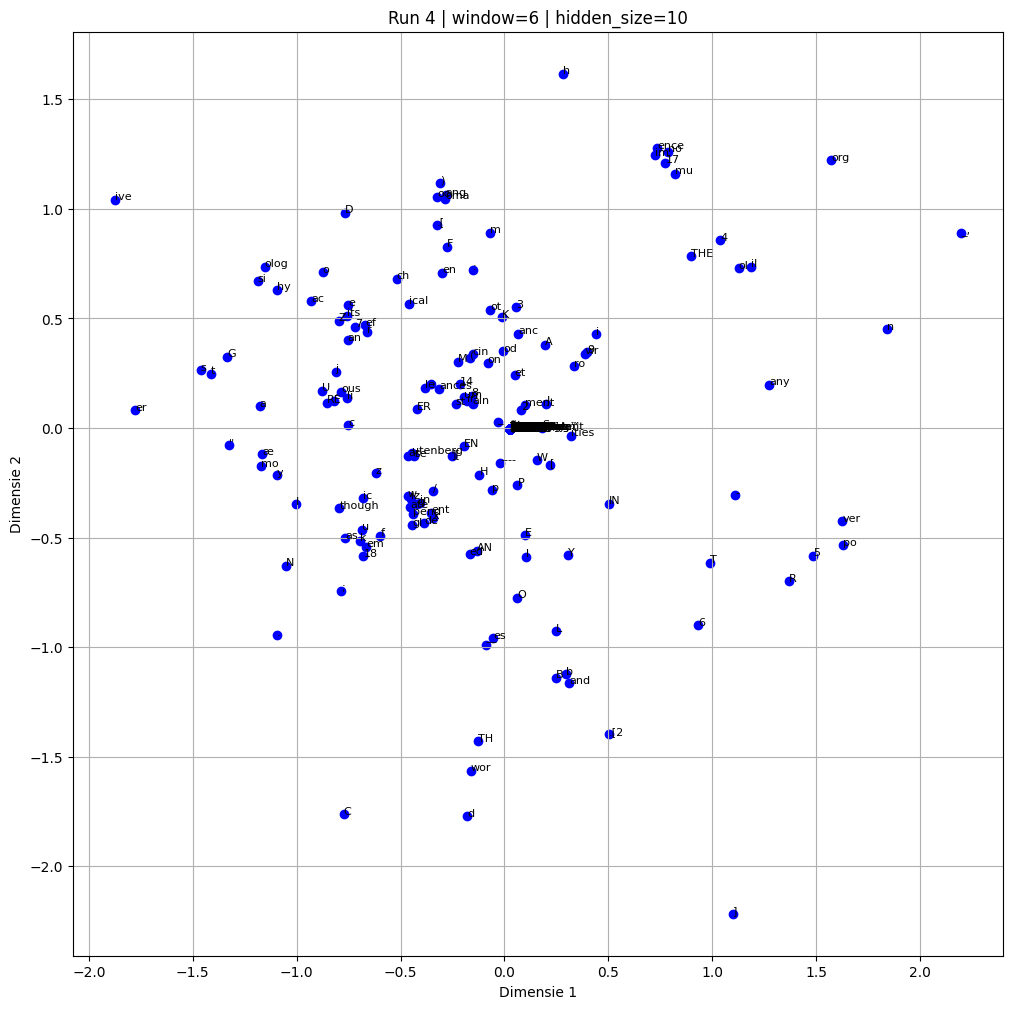

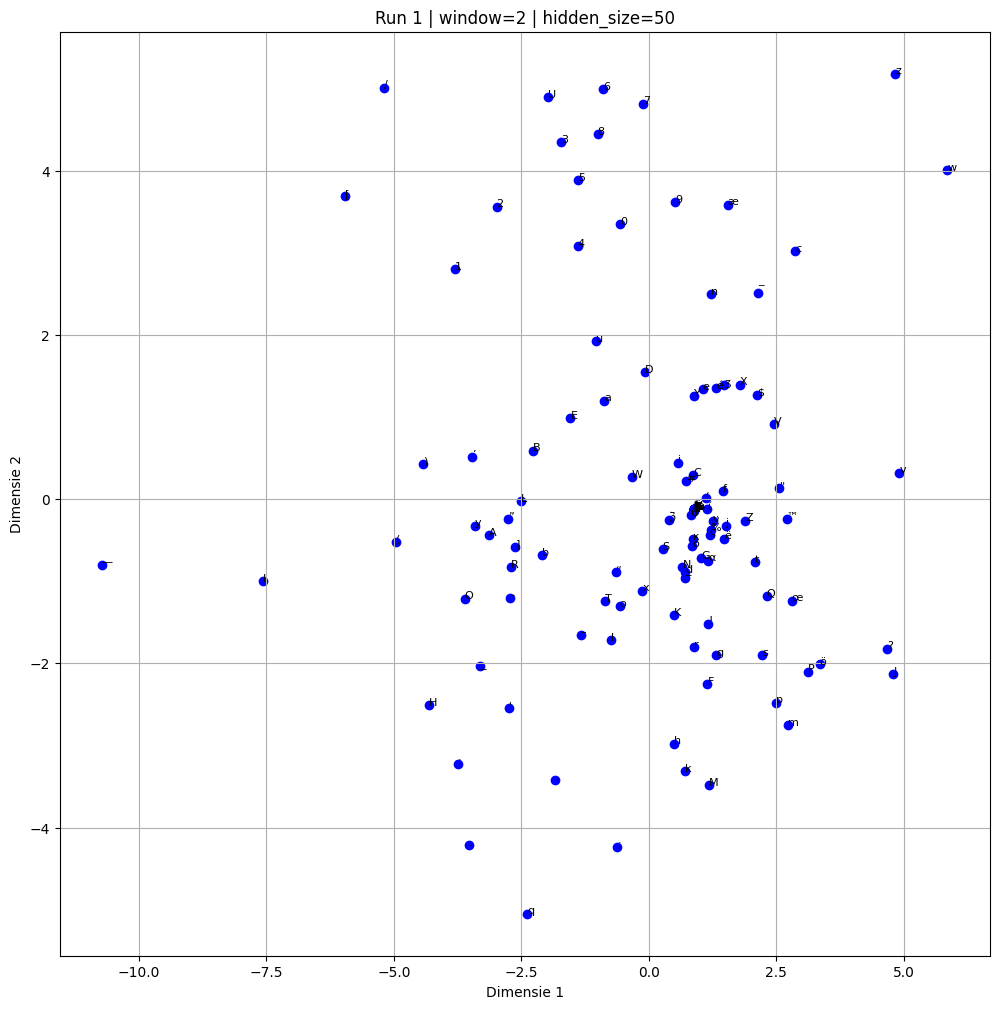

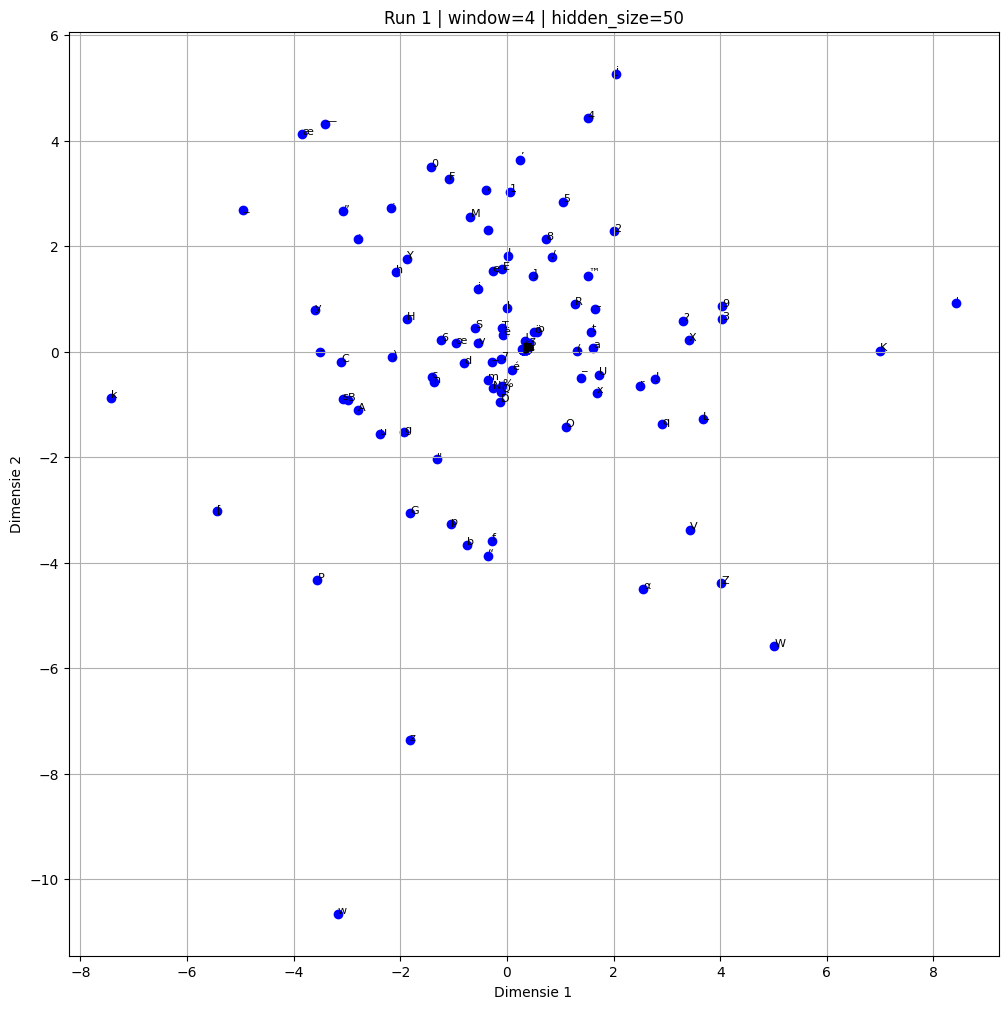

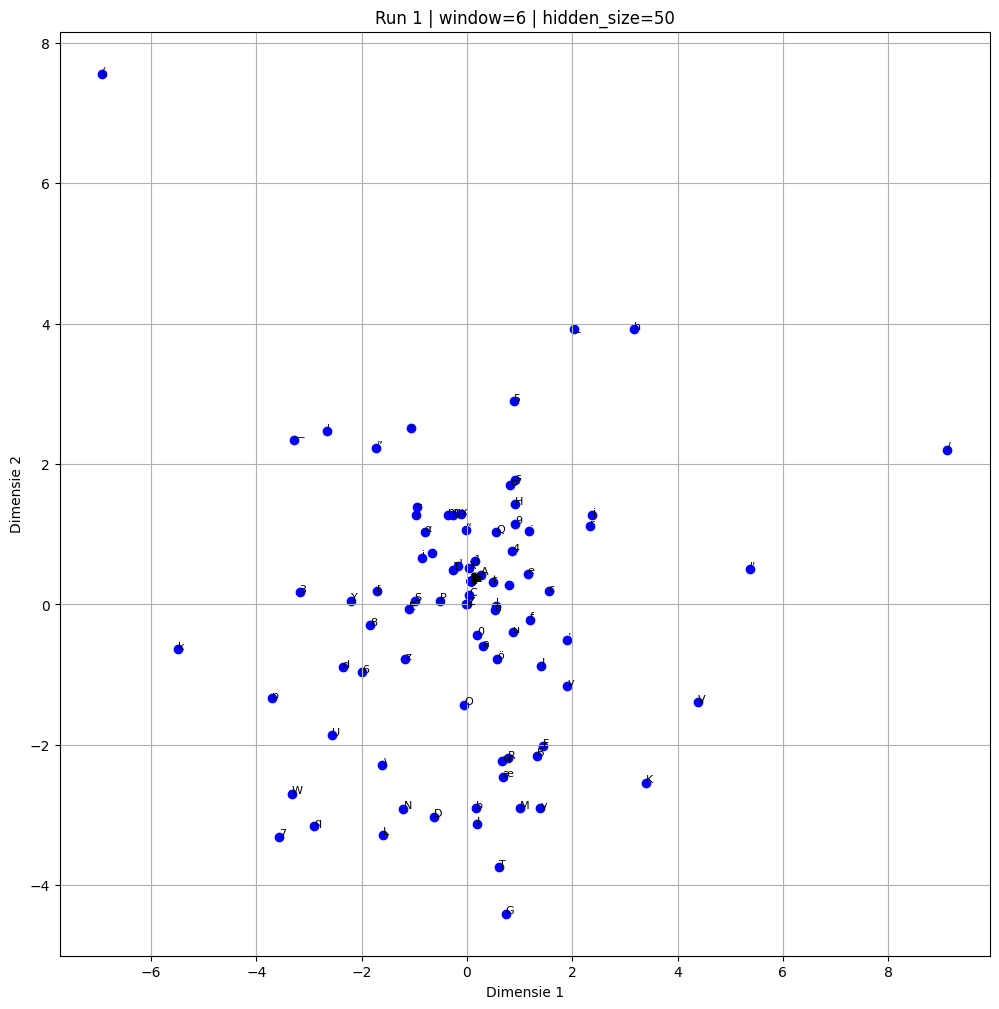

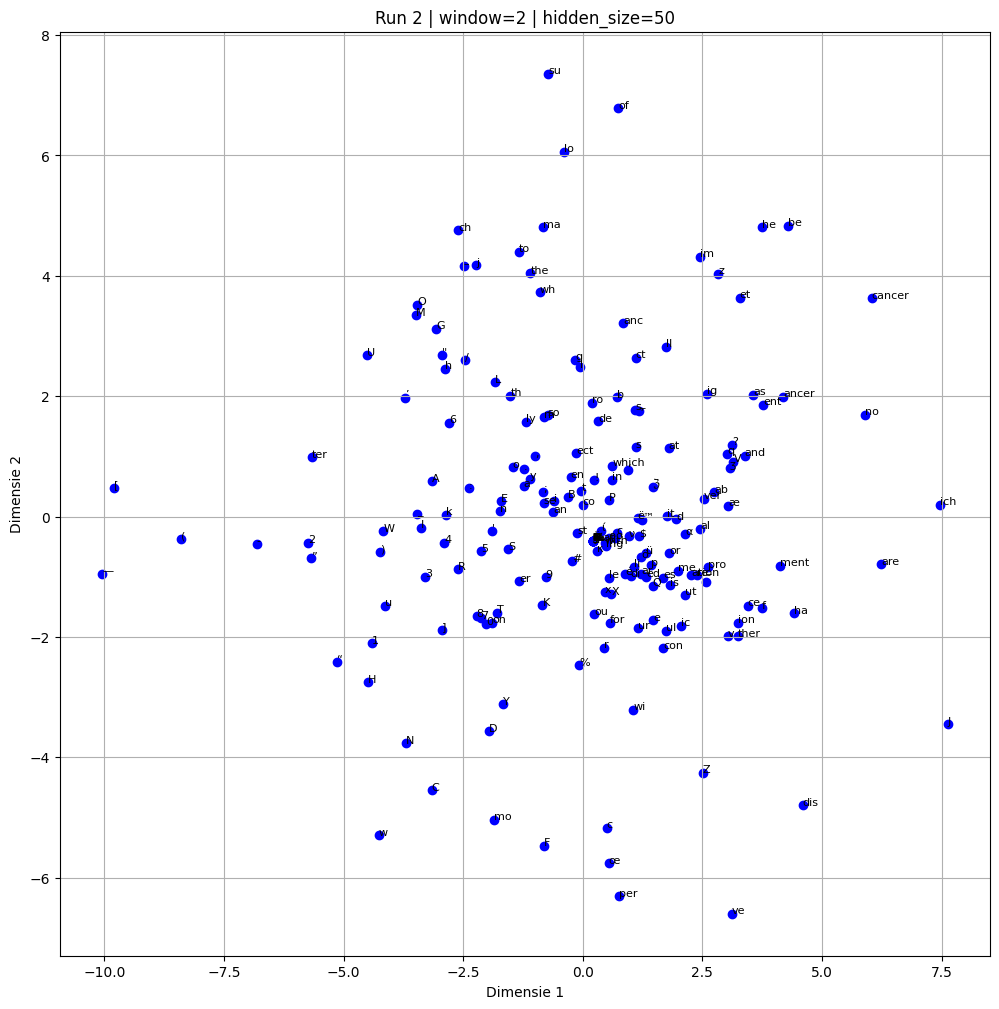

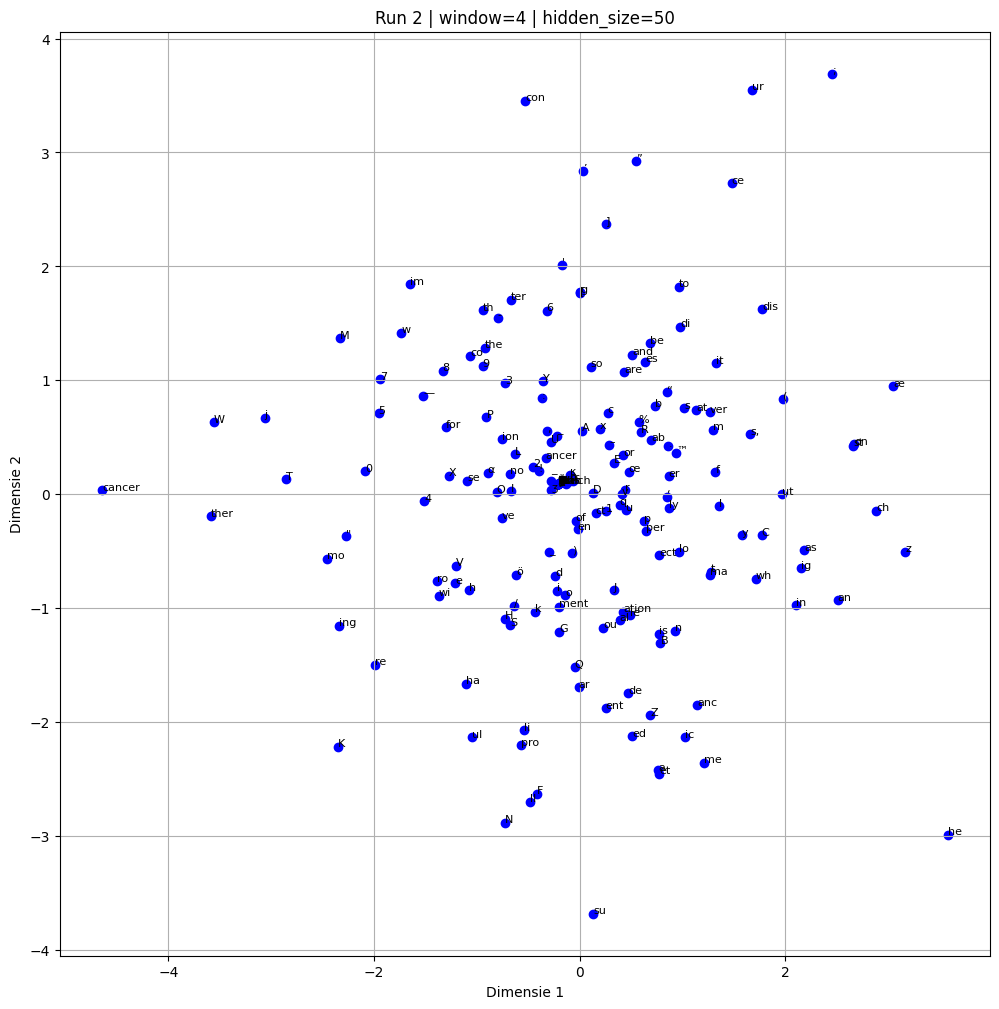

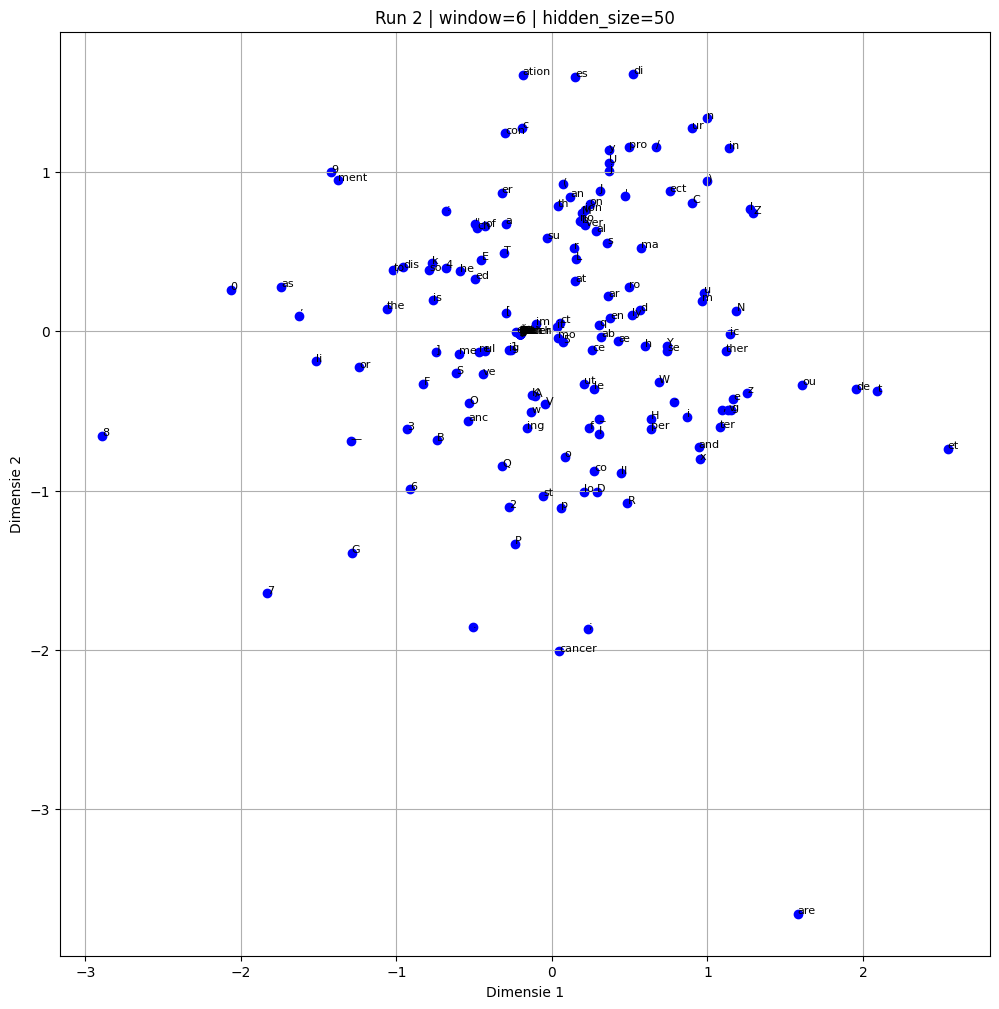

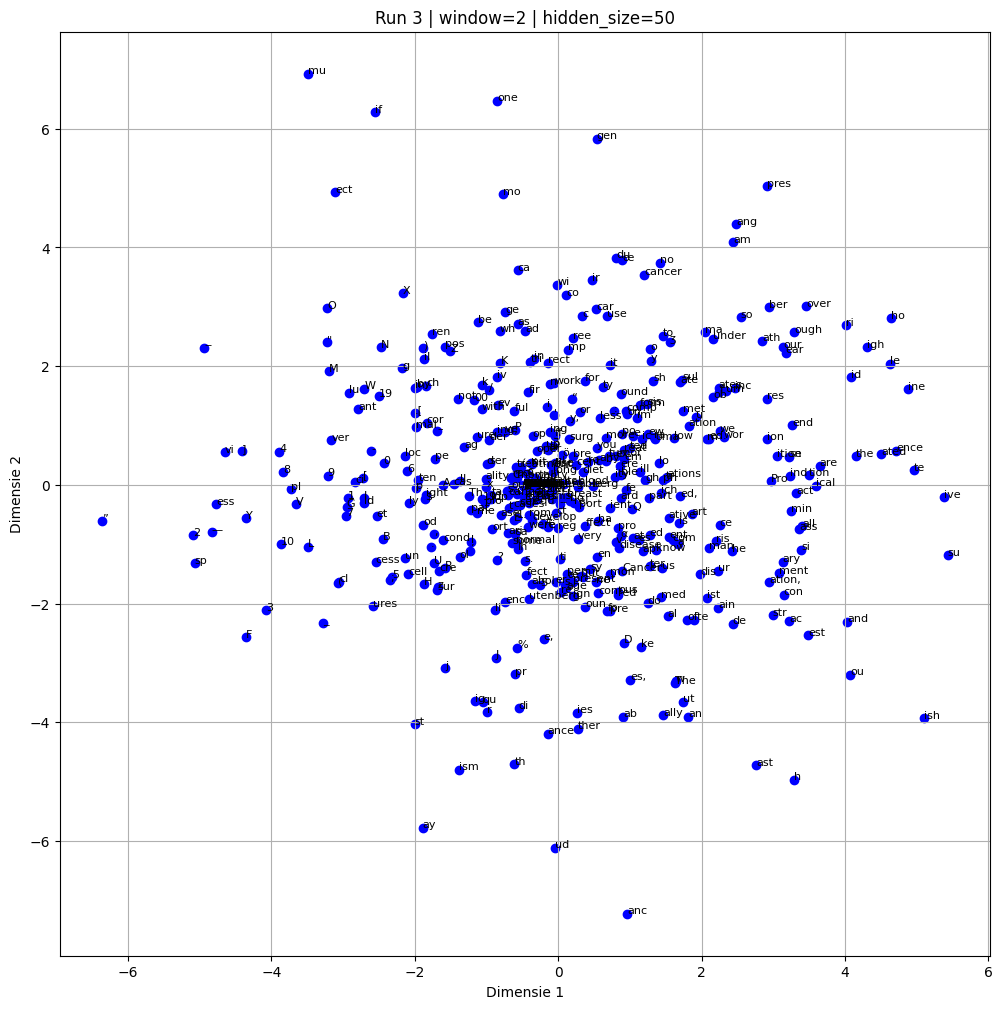

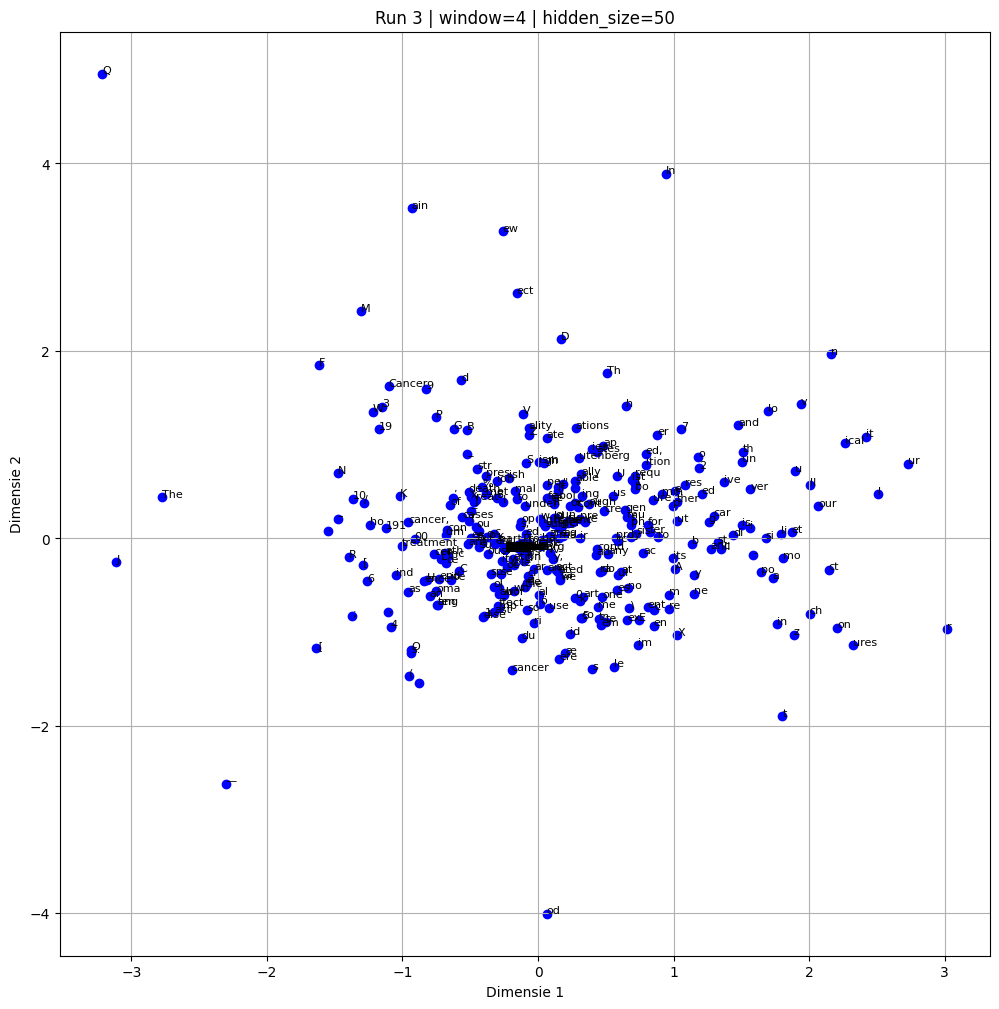

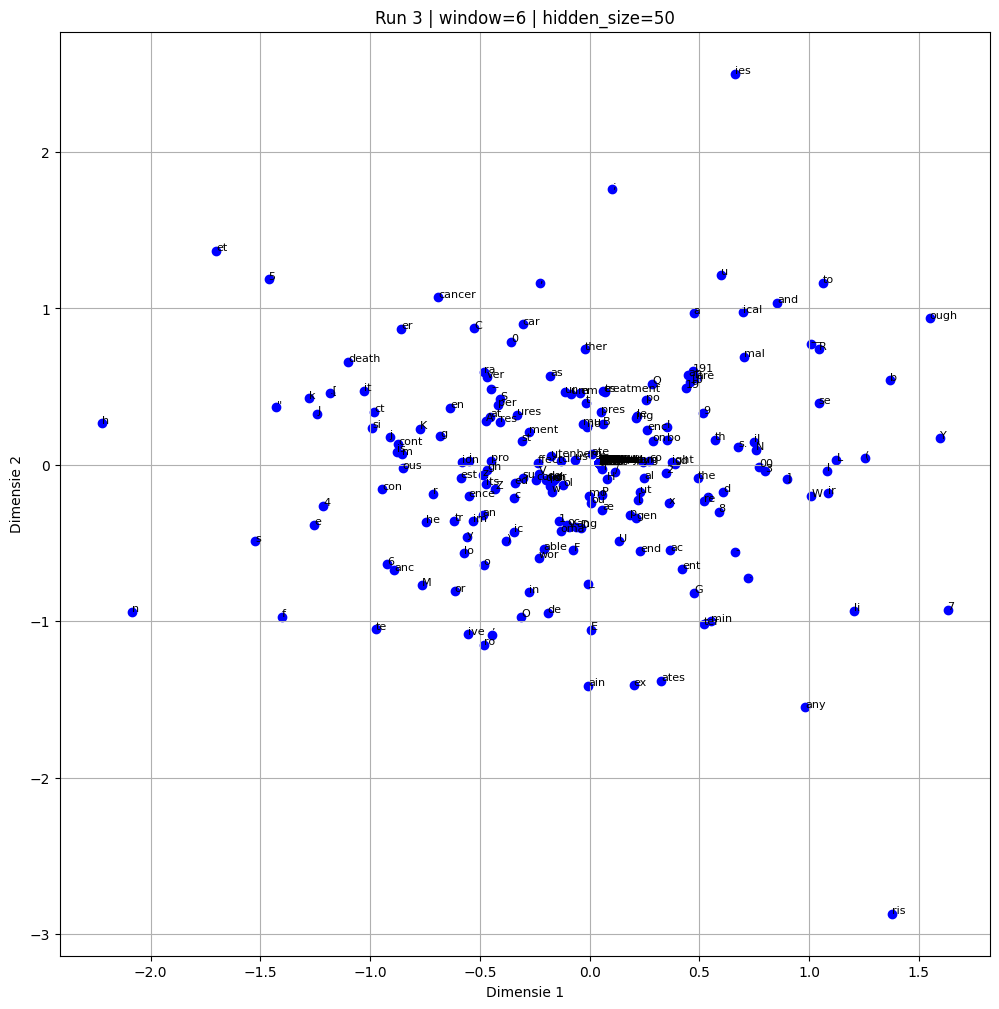

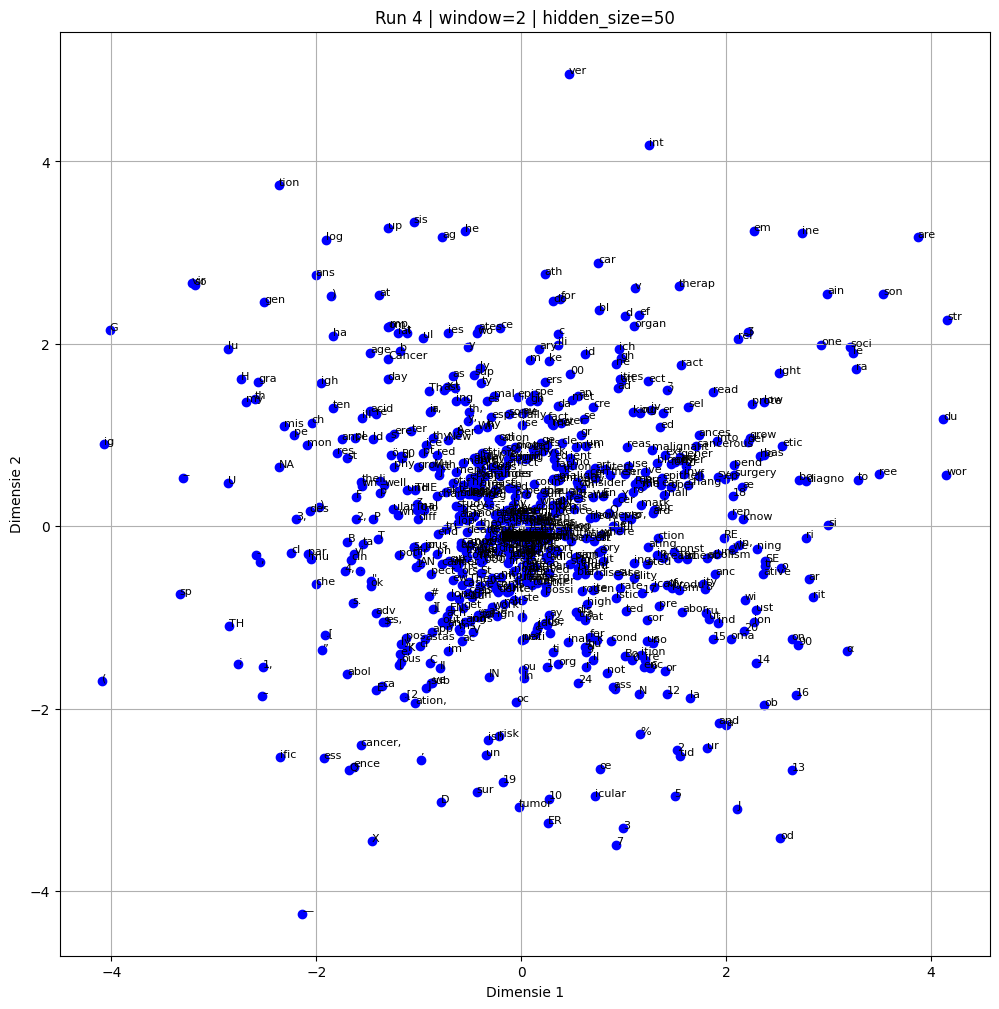

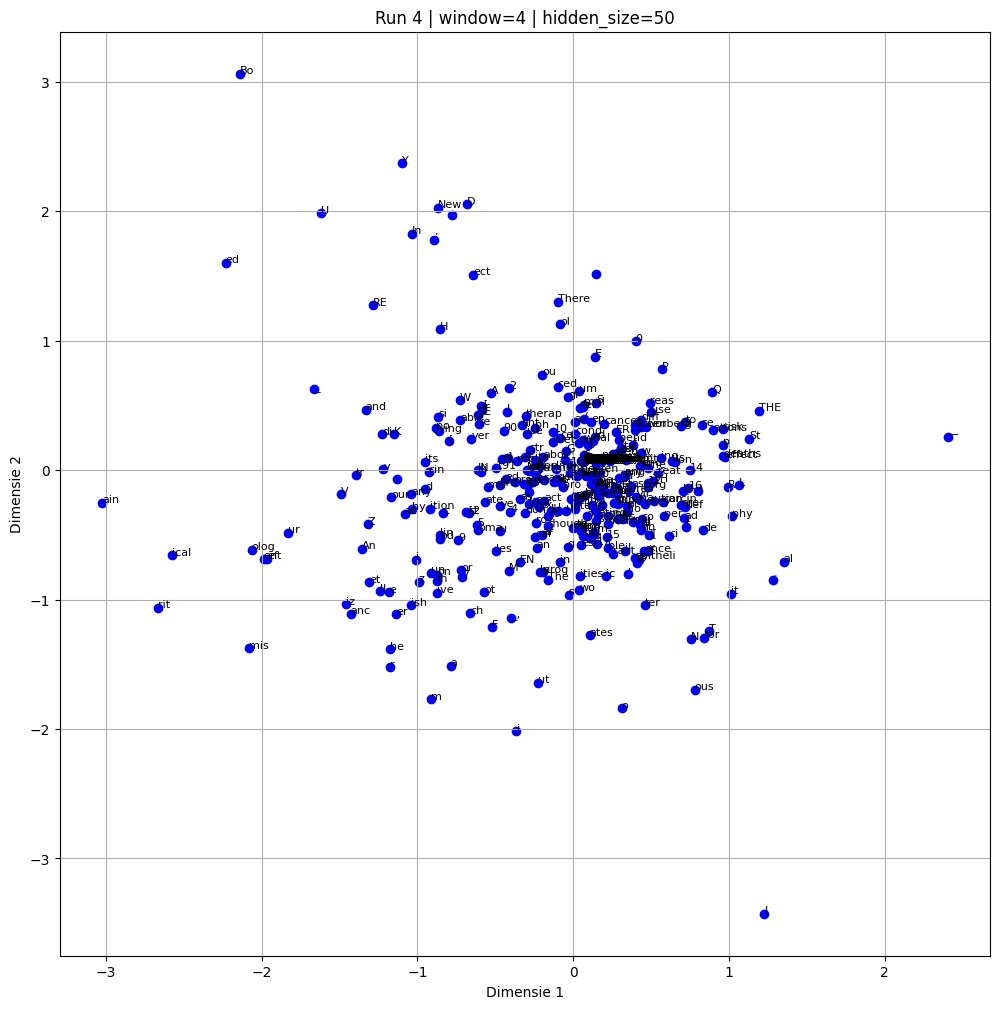

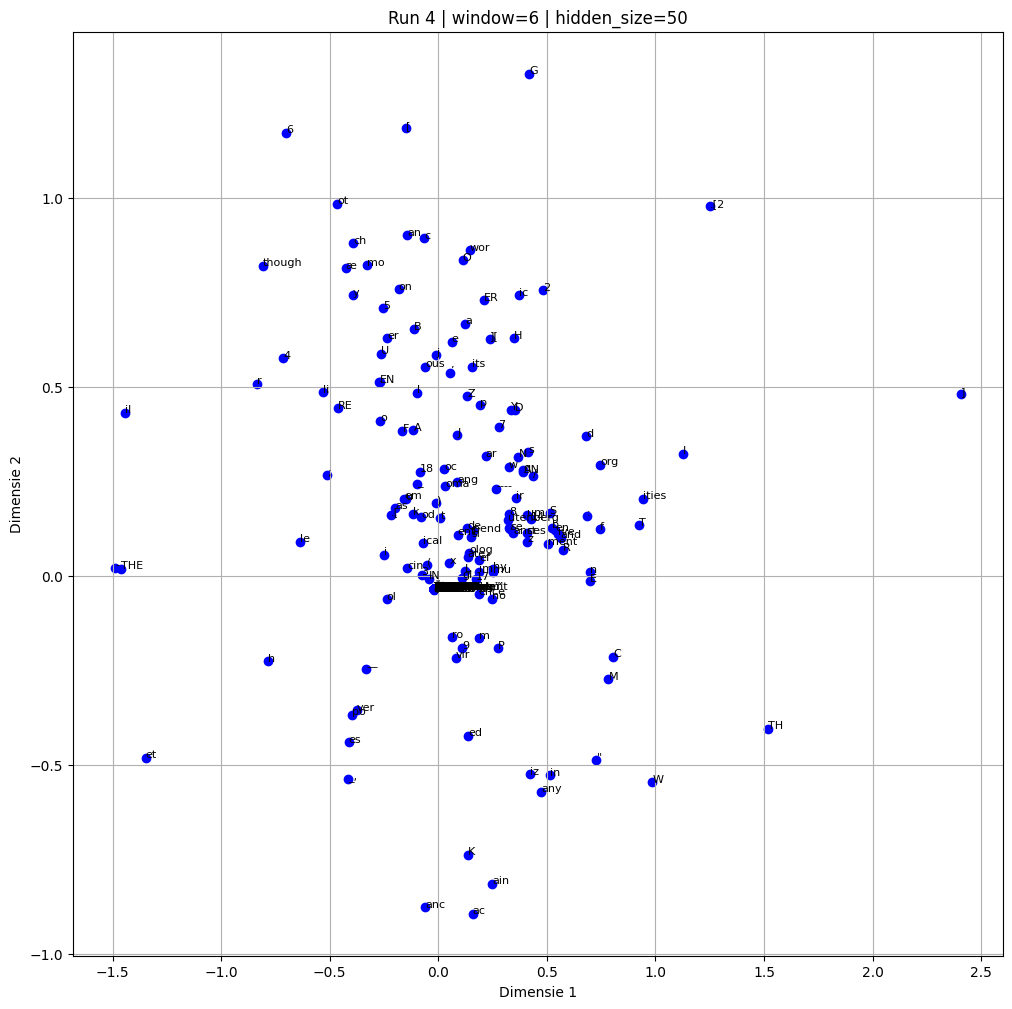

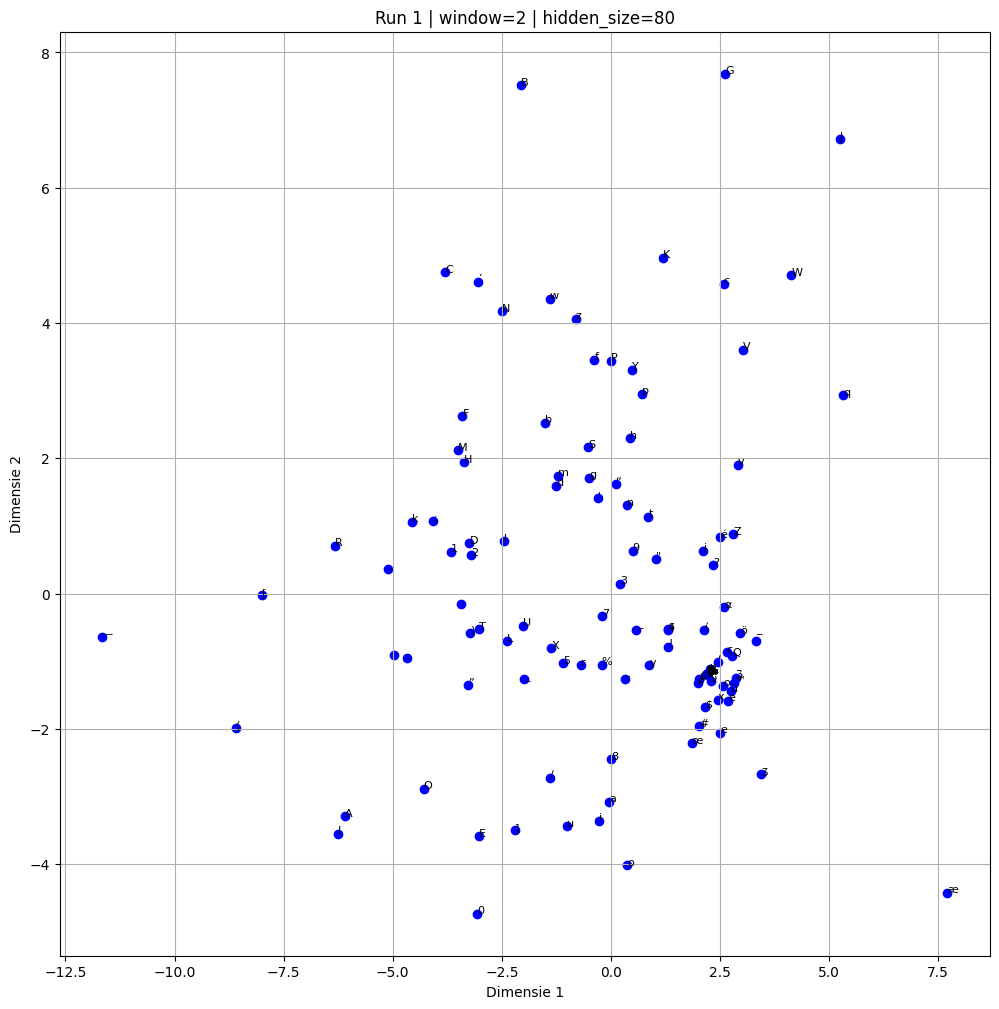

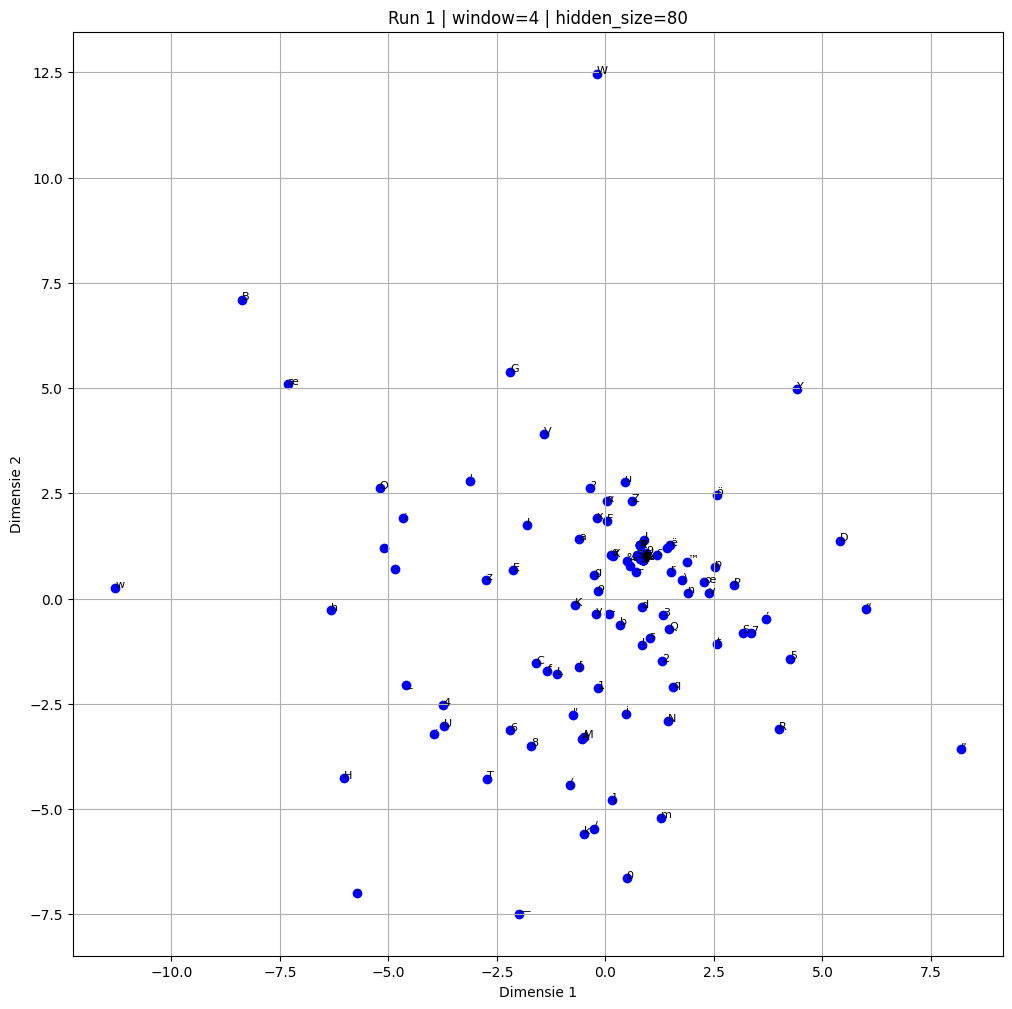

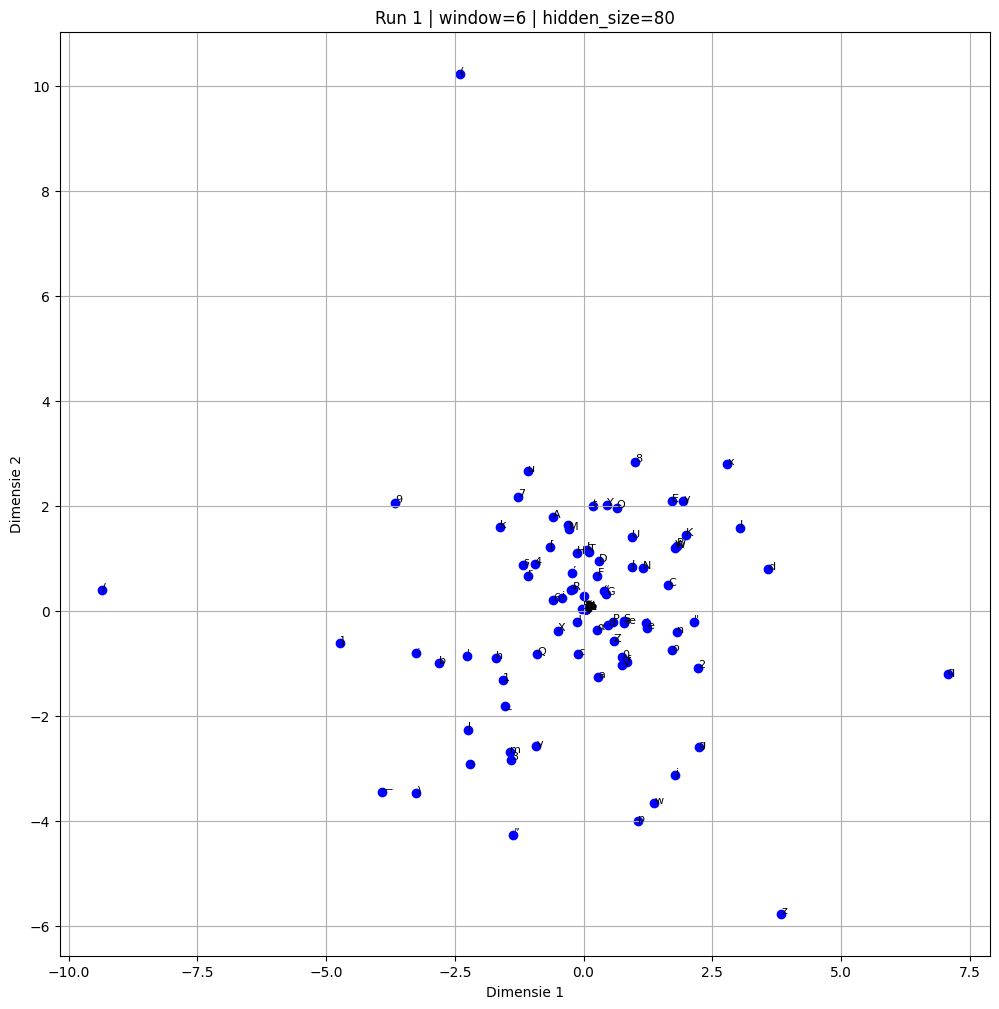

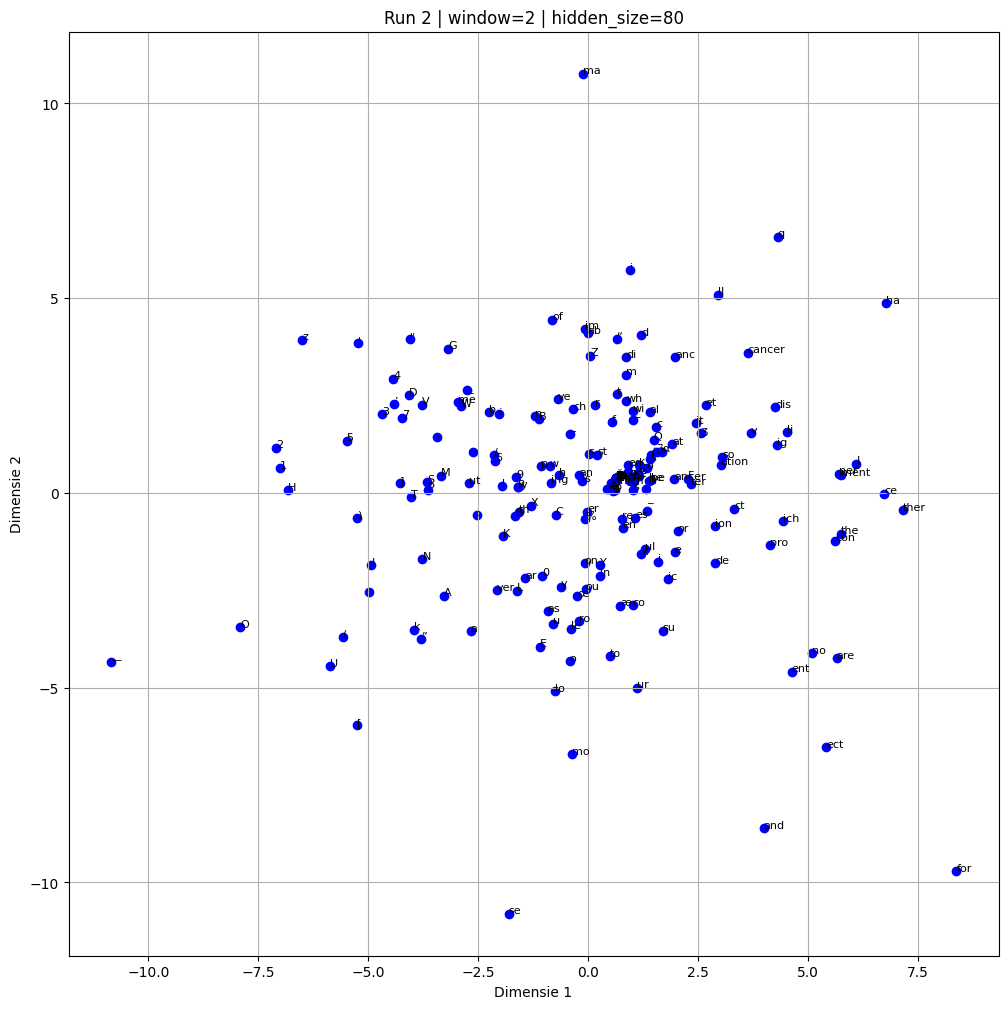

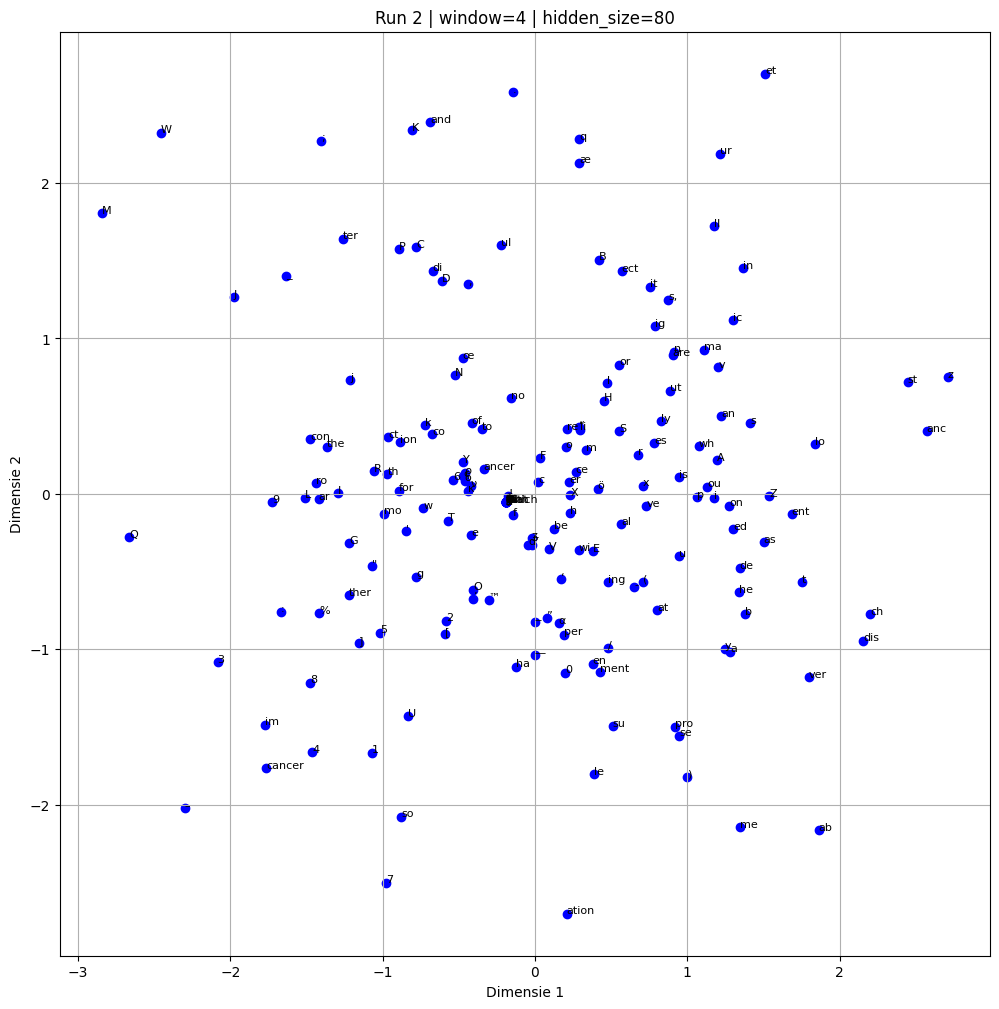

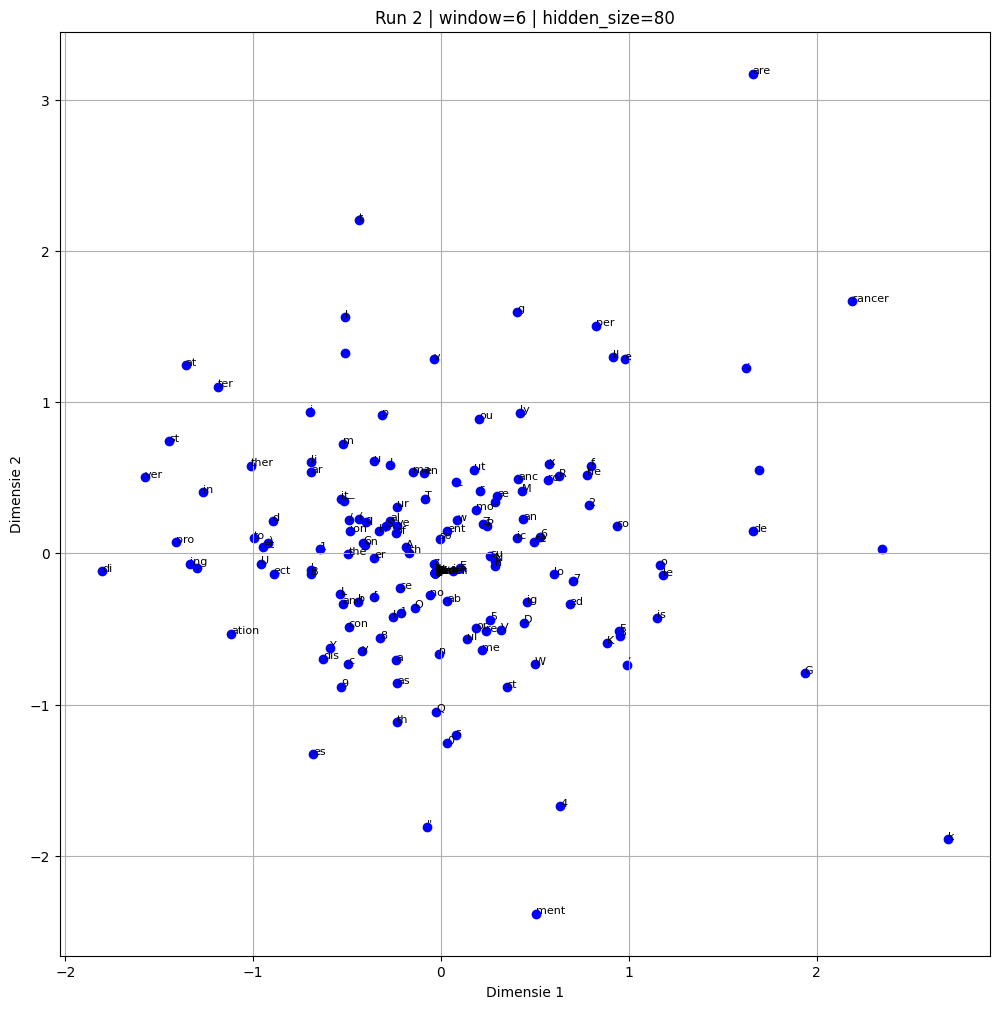

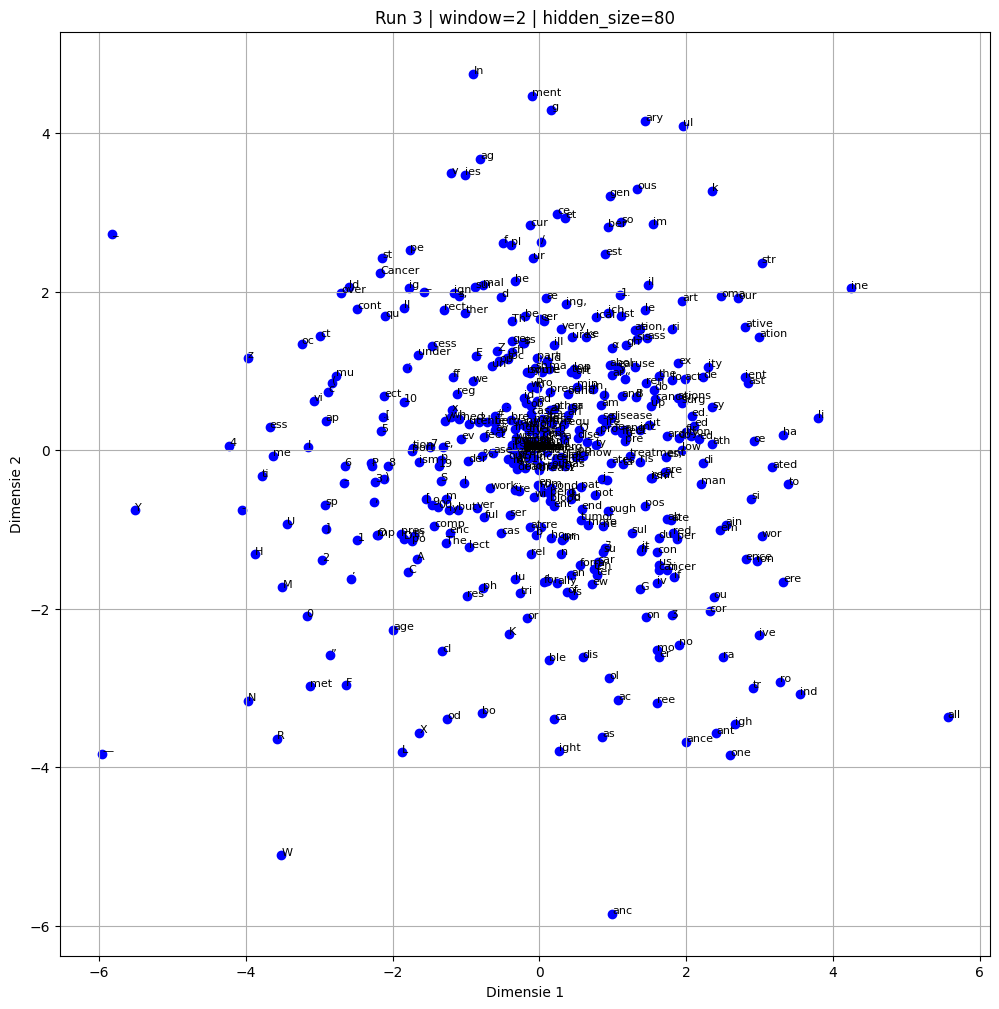

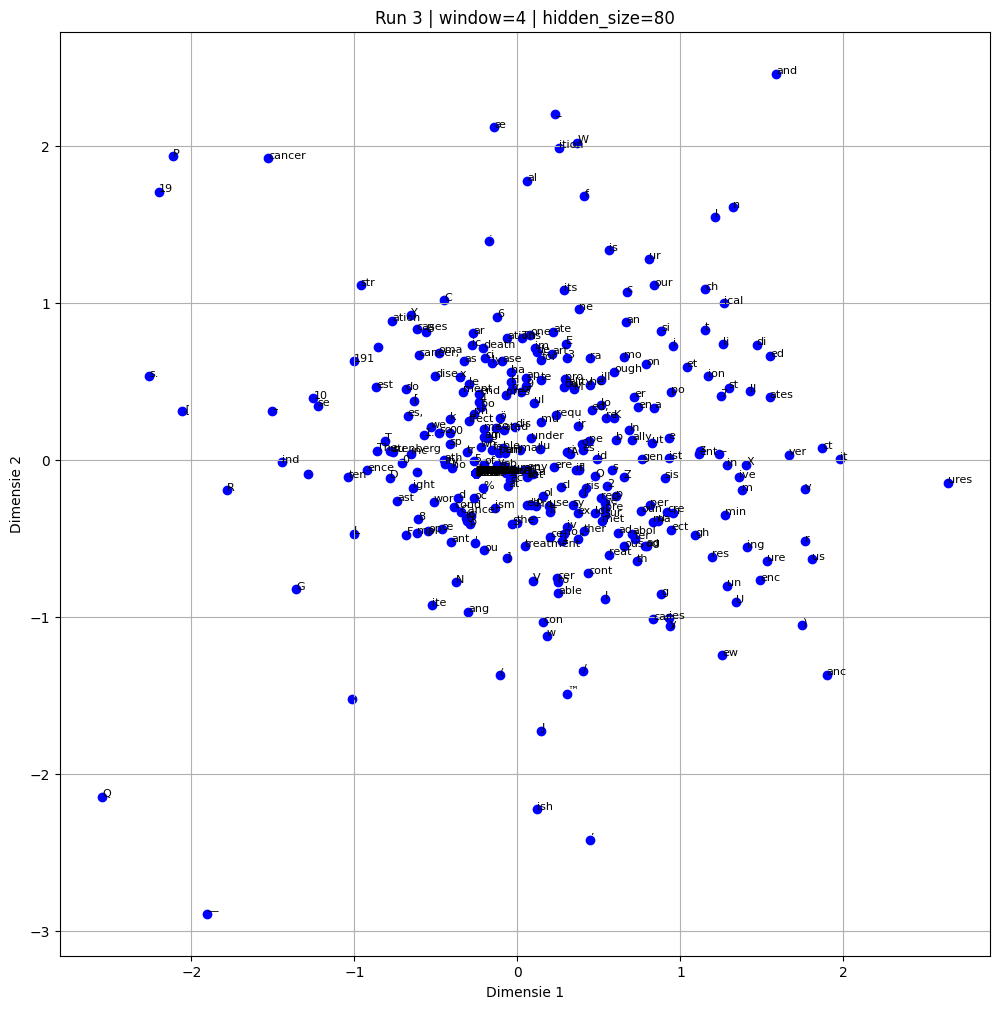

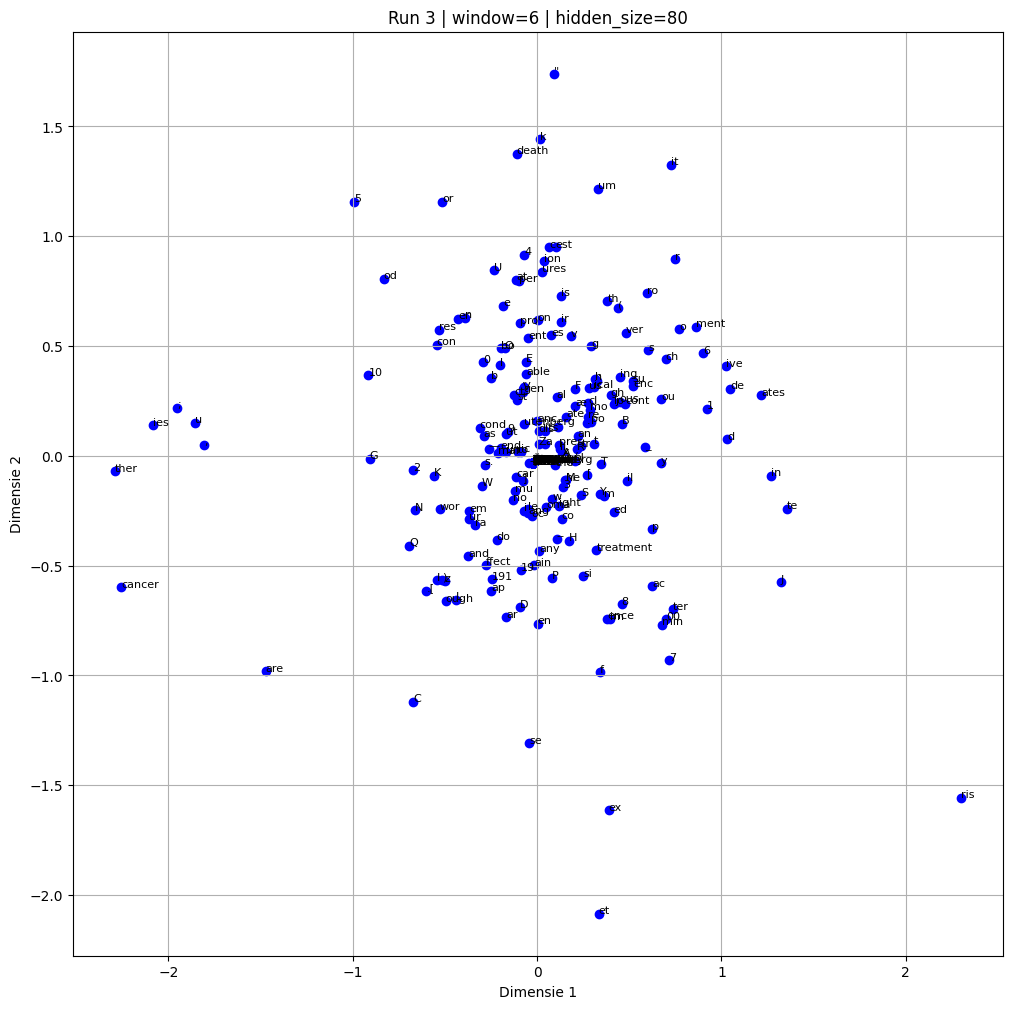

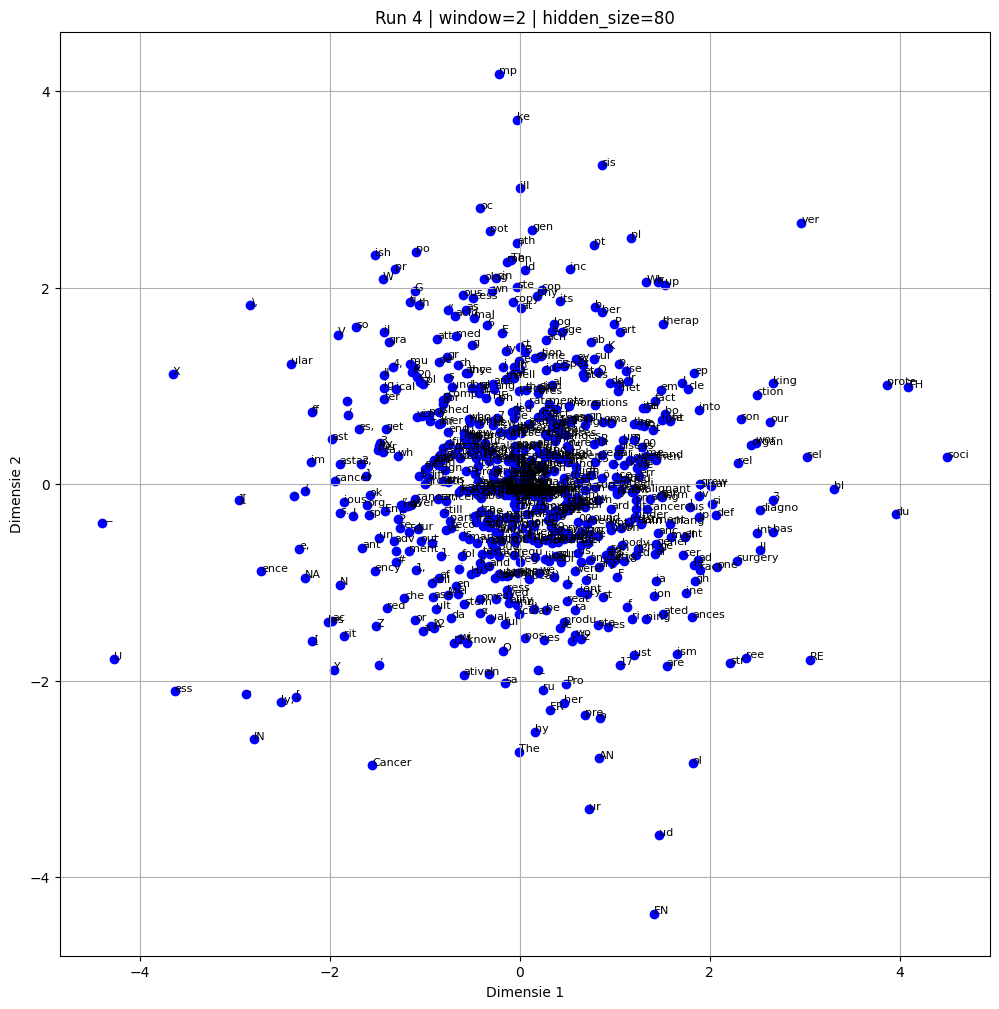

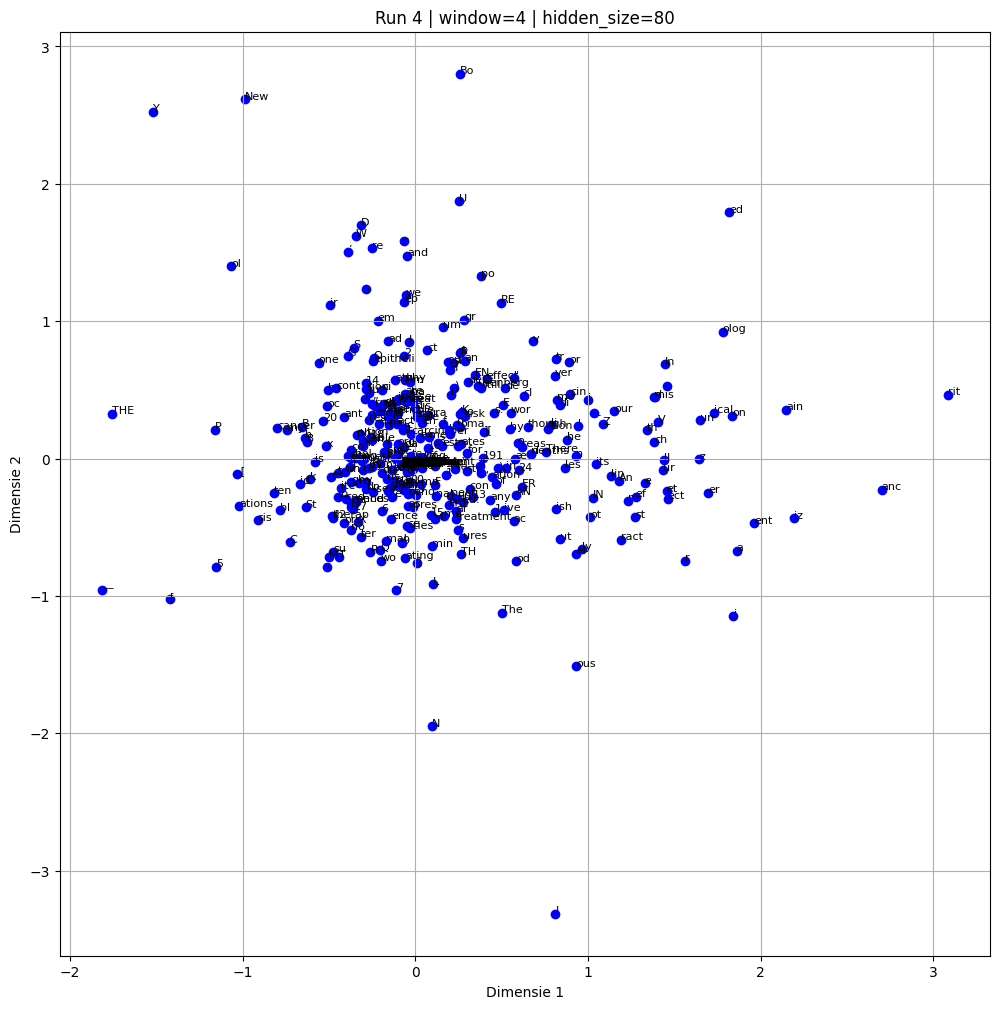

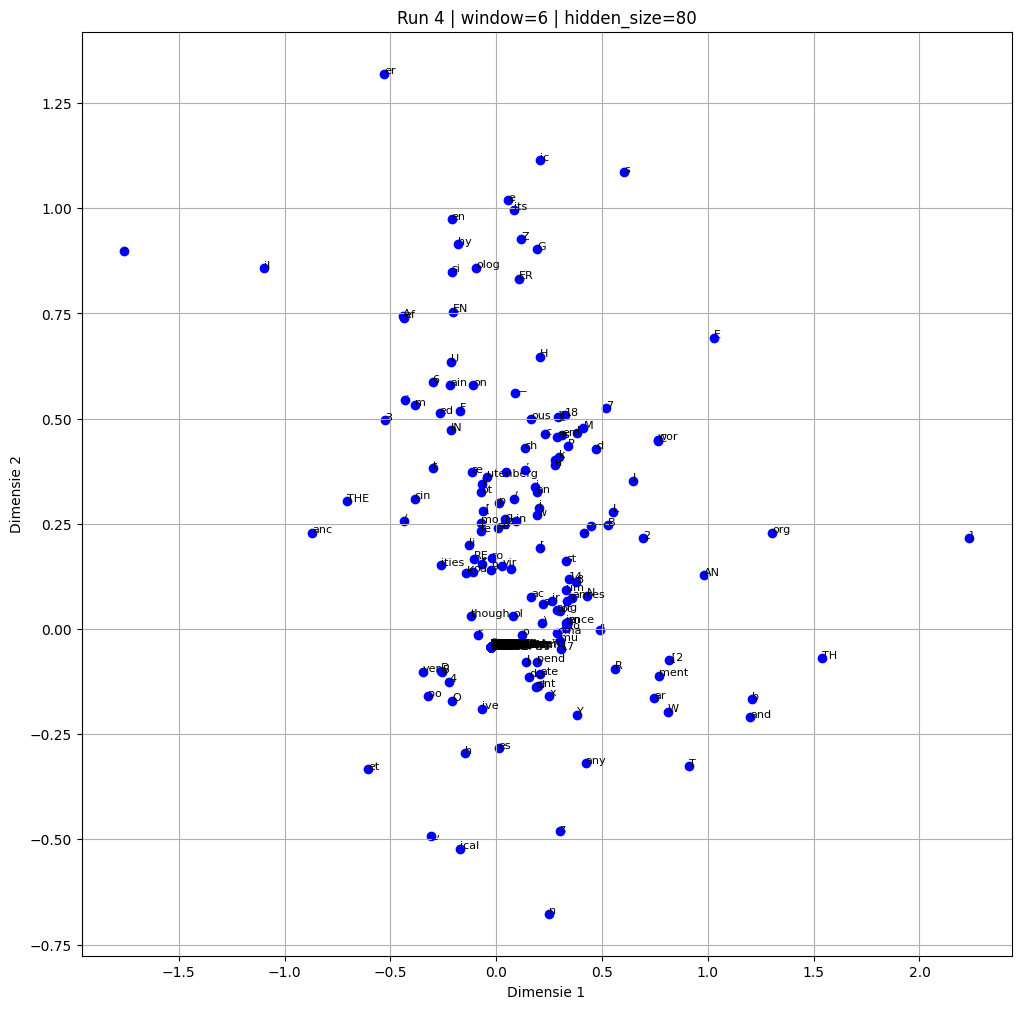

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

for res in mlp_results:
    embeddings = np.array(res["embeddings"])
    token_to_idx = res["token_to_idx"]

    # PCA naar 2D als embeddings meer dan 2 dimensies hebben
    if embeddings.shape[1] > 2:
        pca = PCA(n_components=2)
        embeddings_2d = pca.fit_transform(embeddings)
    else:
        embeddings_2d = embeddings

    # Plotten
    plt.figure(figsize=(12, 12))
    for tok, idx in token_to_idx.items():
        coord = embeddings_2d[idx][:2]  # neem eerste 2 dimensies
        plt.scatter(coord[0], coord[1], color='blue')
        plt.annotate(tok, (coord[0], coord[1]), fontsize=8)

    # Dynamische titel
    plt.title(f"{res['label']} | window={res['window']} | hidden_size={res['hidden_size']}")
    plt.xlabel("Dimensie 1")
    plt.ylabel("Dimensie 2")
    plt.grid(True)
    plt.show()
    plt.close()


Om te onderzoeken of de embeddings semantische relaties hebben geleerd, zoeken we voor elk token het dichtstbijzijnde token in de embeddingruimte (via cosine-similarity). Dit is vergelijkbaar met wat Word2Vec doet.

Wanneer we dit toepassen op de embeddings die we hebben getraind bijvoorbeeld die van Run 2, window=2, die qua dataset het meest stabiel is zou je verwachten dat bepaalde tokens redelijk dicht bij elkaar liggen zoals "cancer" en canc" of "ancer", of "cell" en "cells". Langere tokens bestaan uit beteknisvolle delen van een woord, deze zouden dan ook dicht bij elkaar moeten liggen omdat er een logische relatie is tussen deze tokens.

Korte tokens komen vaak voor in veel verschillende contexten, ze zijn dus erg generiek. Het model kan voor deze korte tokens zoals 1 karakter geen duidelijke betekenisruimte leren. Ze hebben daarom vaak willekeurige buren en buren zonder duidelijke semantiek (relatie/betekenis).

De beste resultaten kun je zien bij window 2, max_tokens tussen de 200 en 500 en een hidden_size van tussen de 50-80. Dit is het gebied waar tokens genoeg context krijgen om echte structuur te leren.

### Conclusie
Hoewel het notebook een functionele pipeline laat zien voor het trainen van token embeddings met een MLP en BPE zijn er een aantal punten waardoor het nog niet optimaal is:
- Databeperking;

De gebruikte dataset is relatief klein vergeleken met echte modellen waardoor de relaties van tokens beperkt zijn. Ook voor grotere window sizes of een groot aantal tokens neemt het aantal trainingsvoorbeelden sterk af, waardoor sommige embeddings minder betrouwbaar zijn.
- Tokenisatie en BPE;

De BPE-encoder maakt samengestelde tokens, maar sommige belangrijke contexten kunnen nog steeds niet goed worden vastgelegd. Ook hebben korte tokens vaak geen duidelijke betekenis in de embedding.

- Modelbeperking;

Het MLP is vooral gebruikt om te fungeren voor demonstraties, maar kan complexe relaties niet zo goed leren als diepere netwerken. Ook wordt de volgorde van tokens niet echt meegenomen.

- Visualisatie

De PCA-reductie naar 2 dimensies laat slechts een indruk zien van de embedding-structuur. Relaties in hogere dimensies kunnen verloren gaan. Ook zijn de plots chaotisch en onoverzichtelijk.
